### NOTES 

* In Diagnosis column, M stands for Malignant and B stands for Benign tumor. Malignant tumor is the one that is cancerous and spreads quickly and spread to other parts of the body , while benign tumor is non-cancerous, grows slowly and does not spread around the body neither spread around the tissue of the tumor region    

### Steps to take 
* Import the dataset 
* remove the column(unnamed) which contains NAN values 
* check for null values in the rows ,remove or fill them respectively and check for duplicated rows .
* check for outliers and remove them.
* labeling on diagnosis column
* separate the dataset into x and y , dependent and independent variables 
* handling imbalanced dataset 
* perform feature scaling and feature selection 
* find the best algorithm !  

In [274]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

##### IMPORTING DATASET

In [275]:
df = pd.read_csv("../dataset/breast_cancer_data.csv")

In [276]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [277]:
df.sample(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
409   905501         B       12.270         17.92           78.41      466.1   
61    858981         B        8.598         20.98           54.66      221.8   
553   924342         B        9.333         21.94           59.01      264.0   
470  9113778         B        9.667         18.49           61.49      289.1   
163  8712064         B       12.340         22.22           79.85      464.5   
56    857637         M       19.210         18.57          125.50     1152.0   
538   921092         B        7.729         25.49           47.98      178.8   
404   904969         B       12.340         14.95           78.29      469.1   
230   881972         M       17.050         19.08          113.40      895.0   
497   914580         B       12.470         17.31           80.45      480.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
409          0.08685           0.06526         0.03211             0.026530   
61           0.12430           0.08963         0.03000             0.009259   
553          0.09240           0.05605         0.03996             0.012820   
470          0.08946           0.06258         0.02948             0.015140   
163          0.10120           0.10150         0.05370             0.028220   
56           0.10530           0.12670         0.13230             0.089940   
538          0.08098           0.04878         0.00000             0.000000   
404          0.08682           0.04571         0.02109             0.020540   
230          0.11410           0.15720         0.19100             0.109000   
497          0.08928           0.07630         0.03609             0.023690   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
409  ...          28.88            89.00       610.2            0.1240   
61   ...          27.04            62.06       273.9            0.1639   
553  ...          25.05            62.86       295.8            0.1103   
470  ...          25.62            70.88       385.2            0.1234   
163  ...          28.68            87.36       553.0            0.1452   
56   ...          28.14           170.10      2145.0            0.1624   
538  ...          30.92            57.17       248.0            0.1256   
404  ...          16.85            84.11       533.1            0.1048   
230  ...          24.89           133.50      1189.0            0.1703   
497  ...          24.34            92.82       607.3            0.1276   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
409            0.17950          0.13770               0.09532          0.3455   
61             0.16980          0.09001               0.02778          0.2972   
553            0.08298          0.07993               0.02564          0.2435   
470            0.15420          0.12770               0.06560          0.3174   
163            0.23380          0.16880               0.08194          0.2268   
56             0.35110          0.38790               0.20910          0.3537   
538            0.08340          0.00000               0.00000          0.3058   
404            0.06744          0.04921               0.04793          0.2298   
230            0.39340          0.50180               0.25430          0.3109   
497            0.25060          0.20280               0.10530          0.3035   

     fractal_dimension_worst  Unnamed: 32  
409                  0.06896          NaN  
61                   0.07712          NaN  
553                  0.07393          NaN  
470                  0.08524          NaN  
163                  0.09082          NaN  
56                   0.08294          NaN  
538                  0.09938          NaN  
404                  0.05974          NaN  
230                  0.09061          NaN  
497                  0.07661          NaN  

[10 rows x 33 columns]

#### value counts of diagnosis

In [278]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

#### REMOVING THE NULL COLUMN (UNNAMED) and ID column, NO USES OF THEM ! 

In [279]:
df.drop(columns=["Unnamed: 32",'id'],inplace=True)

In [280]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

#### CHECKING FOR NULL AND DUPLICATED VALUES 

In [281]:
#checking for null values 
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [282]:
# checking for duplicated values 
df.duplicated().sum()

0

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [284]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

<p>Separating the dataset into dependent and independent variables </p>

In [285]:
x = df.iloc[:,1:]
y = df["diagnosis"]

In [286]:
x

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [287]:
x.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [288]:
from sklearn.preprocessing import StandardScaler

In [289]:
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [290]:
scaled_x = pd.DataFrame(ss.transform(x),columns=x.columns)

In [291]:
scaled_x.describe()

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        -4.995028e-17   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.927930e+00   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count   5.690000e+02            5.690000e+02  ...  5.690000e+02   
mean    1.748260e-16            4.745277e-16  ... -8.241796e-16   
std     1.000880e+00            1.000880e+00  ...  1.000880e+00   
min    -2.744117e+00           -1.819865e+00  ... -1.726901e+00   
25%    -7.032397e-01           -7.226392e-01  ... -6.749213e-01   
50%    -7.162650e-02           -1.782793e-01  ... -2.690395e-01   
75%     5.307792e-01            4.709834e-01  ...  5.220158e-01   
max     4.484751e+00            4.910919e+00  ...  4.094189e+00   

       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
count   5.690000e+02     5.690000e+02  569.000000      5.690000e+02   
mean    1.248757e-17    -3.746271e-16    0.000000     -2.372638e-16   
std     1.000880e+00     1.000880e+00    1.000880      1.000880e+00   
min    -2.223994e+00    -1.693361e+00   -1.222423     -2.682695e+00   
25%    -7.486293e-01    -6.895783e-01   -0.642136     -6.912304e-01   
50%    -4.351564e-02    -2.859802e-01   -0.341181     -4.684277e-02   
75%     6.583411e-01     5.402790e-01    0.357589      5.975448e-01   
max     3.885905e+00     4.287337e+00    5.930172      3.955374e+00   

       compactness_worst  concavity_worst  concave points_worst  \
count       5.690000e+02     5.690000e+02          5.690000e+02   
mean       -3.371644e-16     7.492542e-17          2.247763e-16   
std         1.000880e+00     1.000880e+00          1.000880e+00   
min        -1.443878e+00    -1.305831e+00         -1.745063e+00   
25%        -6.810833e-01    -7.565142e-01         -7.563999e-01   
50%        -2.695009e-01    -2.182321e-01         -2.234689e-01   
75%         5.396688e-01     5.311411e-01          7.125100e-01   
max         5.112877e+00     4.700669e+00          2.685877e+00   

       symmetry_worst  fractal_dimension_worst  
count    5.690000e+02             5.690000e+02  
mean     2.622390e-16            -5.744282e-16  
std      1.000880e+00             1.000880e+00  
min     -2.160960e+00            -1.601839e+00  
25%     -6.418637e-01            -6.919118e-01  
50%     -1.274095e-01            -2.164441e-01  
75%      4.501382e-01             4.507624e-01  
max      6.046041e+00             6.846856e+00  

[8 rows x 30 columns]

In [292]:
len(scaled_x.columns)

30

Here, there are total of 30 columns, so we are dividing into each 10 columns and creating violinplot and boxplot of it .

In [293]:
first_ten_temp_df = pd.concat([y,scaled_x.iloc[:,0:10]],axis=1)

In [294]:
first_ten_temp_df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M     1.097064     -2.073335        1.269934   0.984375   
1           M     1.829821     -0.353632        1.685955   1.908708   
2           M     1.579888      0.456187        1.566503   1.558884   
3           M    -0.768909      0.253732       -0.592687  -0.764464   
4           M     1.750297     -1.151816        1.776573   1.826229   
..        ...          ...           ...             ...        ...   
564         M     2.110995      0.721473        2.060786   2.343856   
565         M     1.704854      2.085134        1.615931   1.723842   
566         M     0.702284      2.045574        0.672676   0.577953   
567         M     1.838341      2.336457        1.982524   1.735218   
568         B    -1.808401      1.221792       -1.814389  -1.347789   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           1.568466          3.283515        2.652874             2.532475   
1          -0.826962         -0.487072       -0.023846             0.548144   
2           0.942210          1.052926        1.363478             2.037231   
3           3.283553          3.402909        1.915897             1.451707   
4           0.280372          0.539340        1.371011             1.428493   
..               ...               ...             ...                  ...   
564         1.041842          0.219060        1.947285             2.320965   
565         0.102458         -0.017833        0.693043             1.263669   
566        -0.840484         -0.038680        0.046588             0.105777   
567         1.525767          3.272144        3.296944             2.658866   
568        -3.112085         -1.150752       -1.114873            -1.261820   

     symmetry_mean  fractal_dimension_mean  
0         2.217515                2.255747  
1         0.001392               -0.868652  
2         0.939685               -0.398008  
3         2.867383                4.910919  
4        -0.009560               -0.562450  
..             ...                     ...  
564      -0.312589               -0.931027  
565      -0.217664               -1.058611  
566      -0.809117               -0.895587  
567       2.137194                1.043695  
568      -0.820070               -0.561032  

[569 rows x 11 columns]

melting the first 10 to create the graphs such that i can visualize the outliers and their relations to more detail ! 

In [295]:
first_ten_melted_df = pd.melt(first_ten_temp_df,id_vars="diagnosis",var_name="features")

In [296]:
first_ten_melted_df

diagnosis                features     value
0            M             radius_mean  1.097064
1            M             radius_mean  1.829821
2            M             radius_mean  1.579888
3            M             radius_mean -0.768909
4            M             radius_mean  1.750297
...        ...                     ...       ...
5685         M  fractal_dimension_mean -0.931027
5686         M  fractal_dimension_mean -1.058611
5687         M  fractal_dimension_mean -0.895587
5688         M  fractal_dimension_mean  1.043695
5689         B  fractal_dimension_mean -0.561032

[5690 rows x 3 columns]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

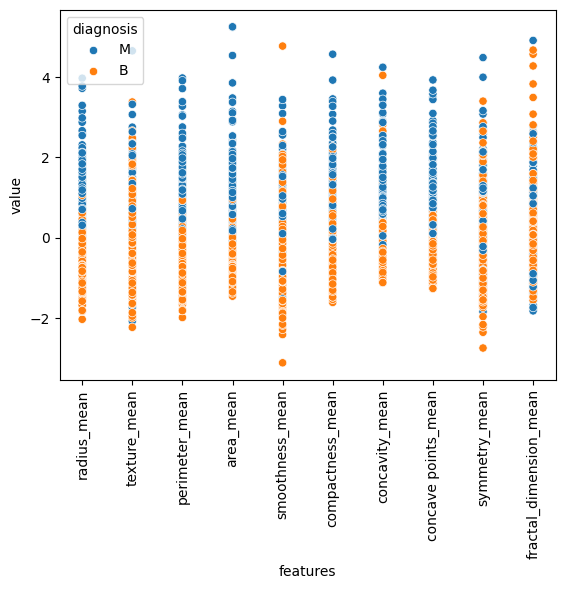

In [297]:
sns.scatterplot(x="features",y="value",data=first_ten_melted_df,hue="diagnosis")
plt.xticks(rotation=90)

From the above graph we can see that there is higher chances of cancer when the values are higher except for fractal_dimension_mean and symmetry_mean ! , we will soon look upon the relation of this feature using heatmap ! 


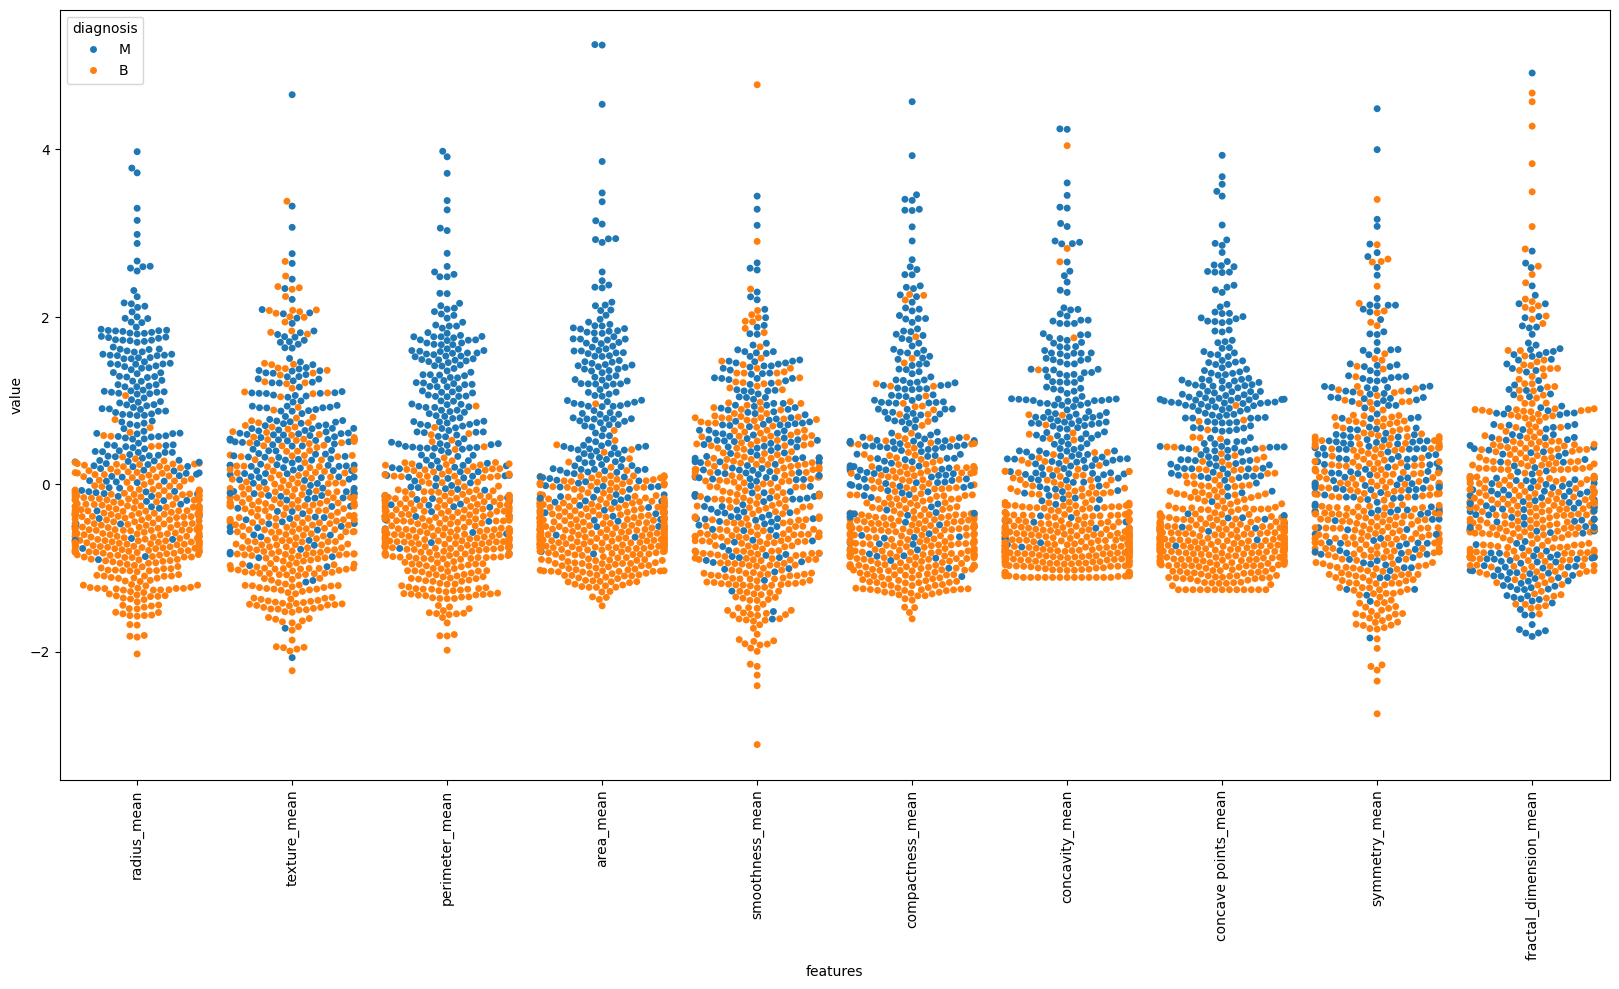

In [298]:
plt.figure(figsize=(20,10))
sns.swarmplot(data=first_ten_melted_df,x="features",y="value",hue="diagnosis")
# plt.yticks()
plt.xticks(rotation=90)
plt.show()

Again here using swarmplot we can clearly see that most of the malignant cancer has the higher value of more than 2 , so , the only bit of exception seems to be symmetry_mean and fractal_dimension_mean

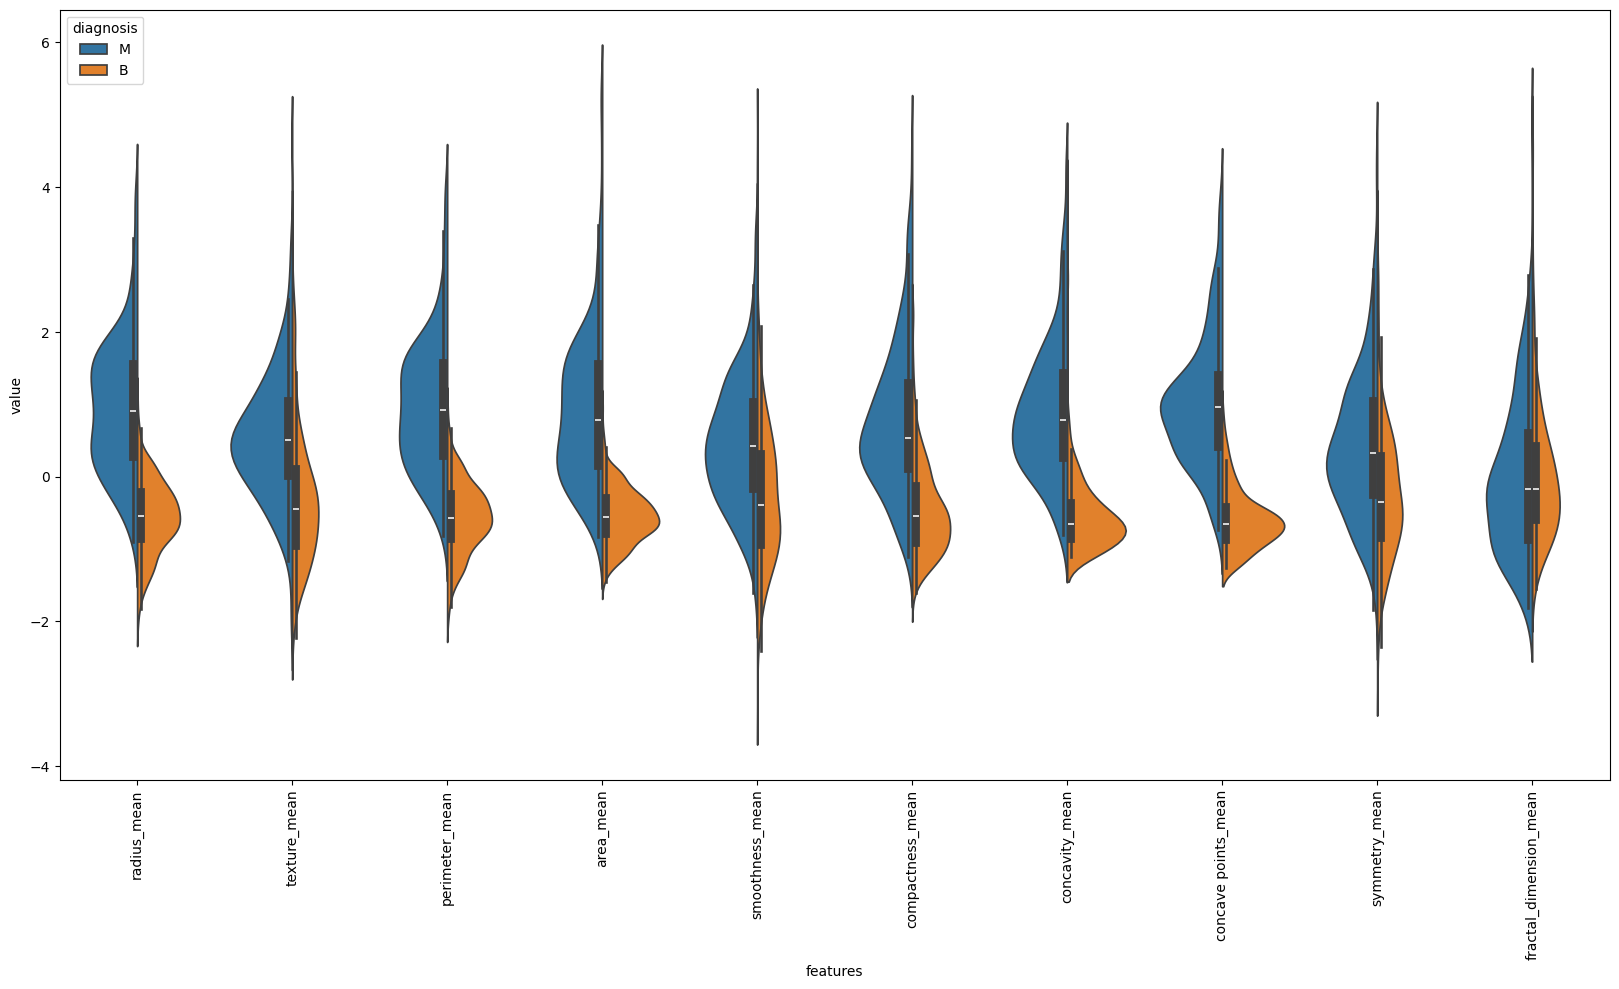

In [299]:
plt.figure(figsize=(20,10))
sns.violinplot(data=first_ten_melted_df,x="features",y="value",hue="diagnosis",split=True,inner="box")
plt.xticks(rotation=90)
plt.show()

here, from the above graph , fractal_dimension_mean seems to have the same median dataset , which is not quite good for classification ! 

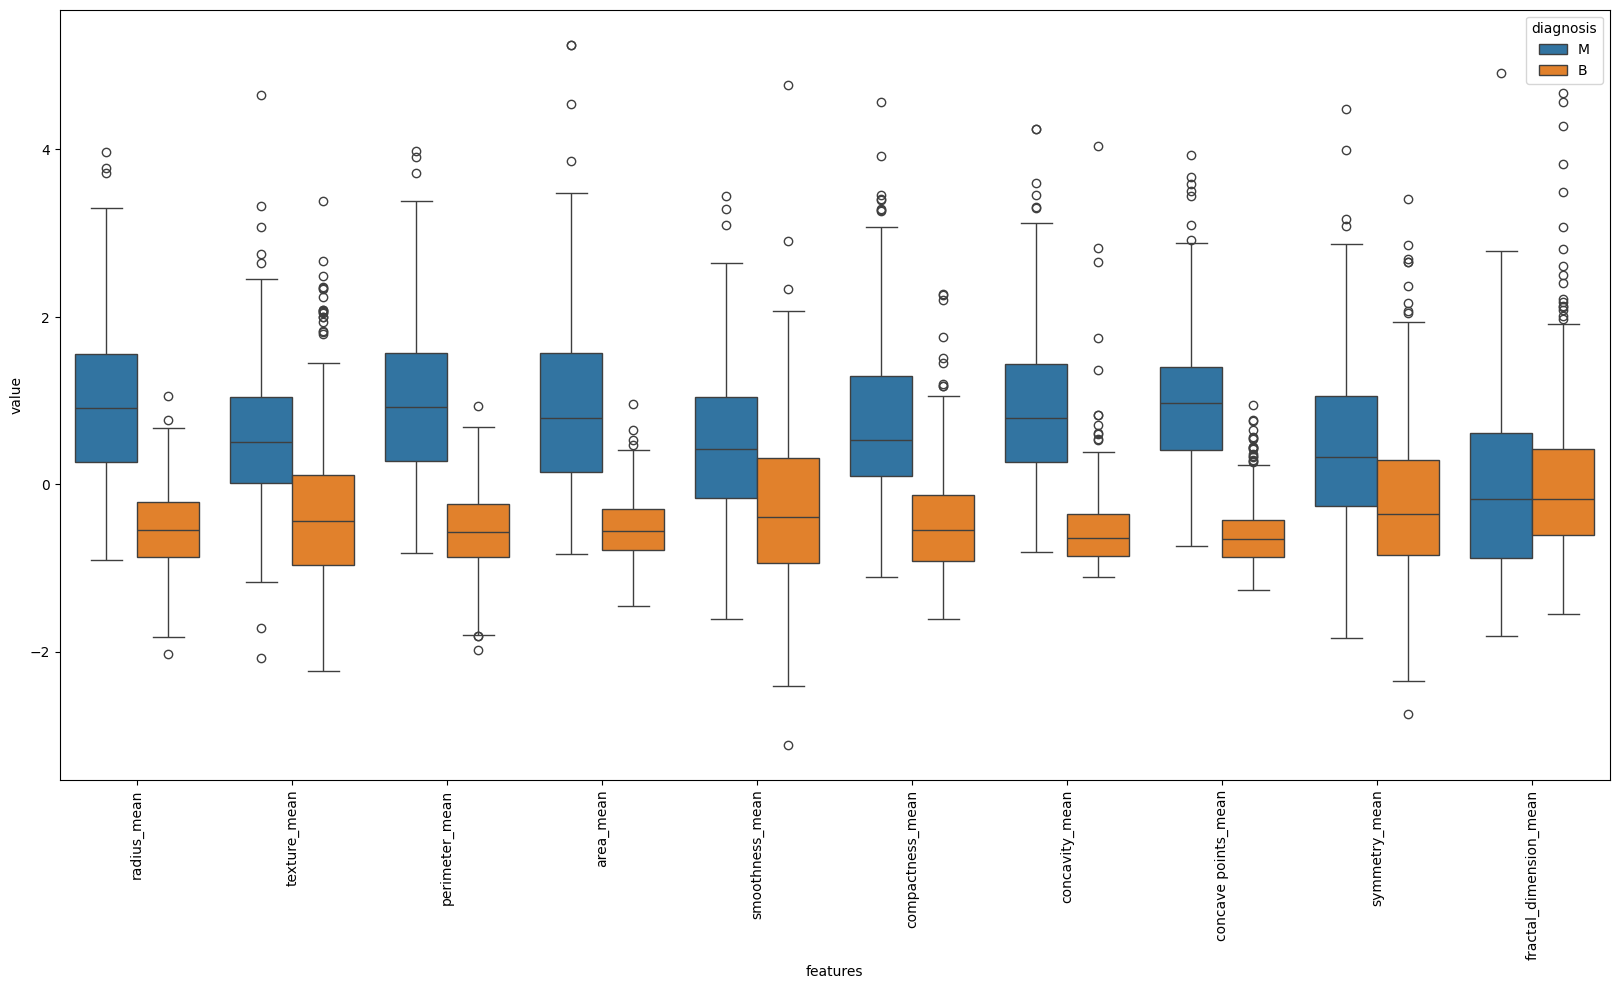

In [300]:
plt.figure(figsize=(20,10))
sns.boxplot(data=first_ten_melted_df,x="features",y="value",hue="diagnosis")
plt.xticks(rotation=90)
plt.show()

### REMOVING OUTLIERs

In [301]:
q1 = first_ten_melted_df["value"].quantile(0.25)
q3 = first_ten_melted_df["value"].quantile(0.75)
IQR = q3 - q1 
min_range = q1 - (IQR*1.5)
max_range = q3 + (IQR*1.5)

In [302]:
min_range,max_range

(-2.57865898950356, 2.391181108816987)

In [303]:
filtered_df = first_ten_melted_df[(first_ten_melted_df["value"]>= min_range) & (first_ten_melted_df["value"]<= max_range)] 

Now again , checking in the box plot  

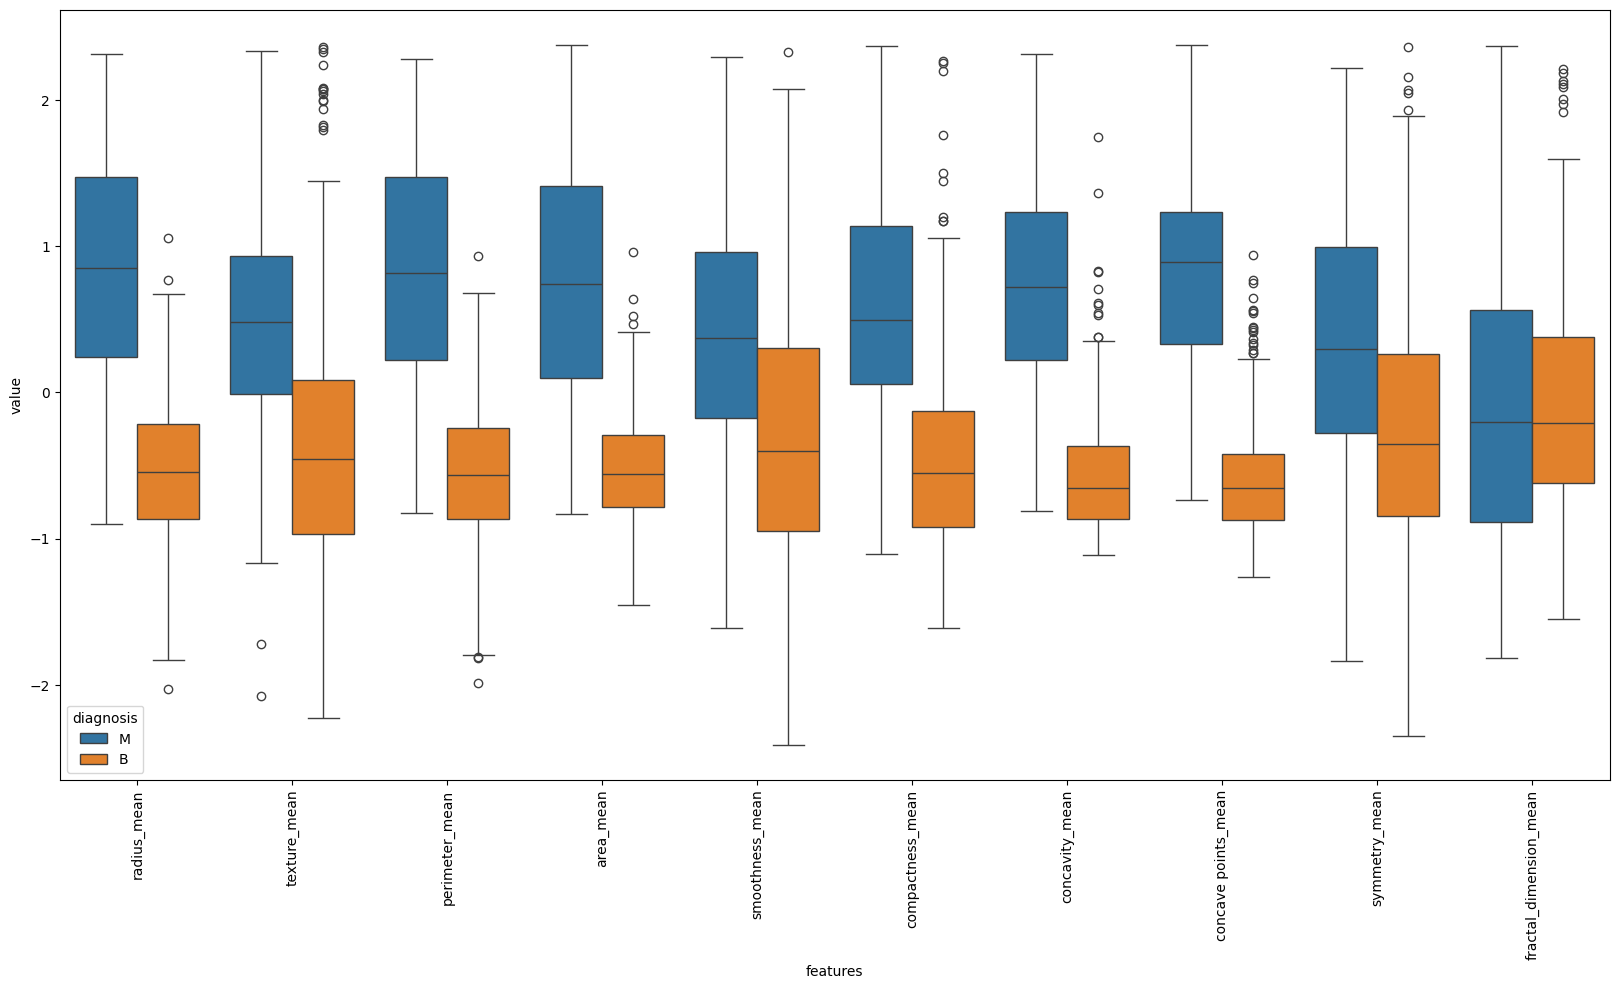

In [304]:
plt.figure(figsize=(20,10))
sns.boxplot(data=filtered_df,x="features",y="value",hue="diagnosis")
plt.xticks(rotation=90)
plt.show()

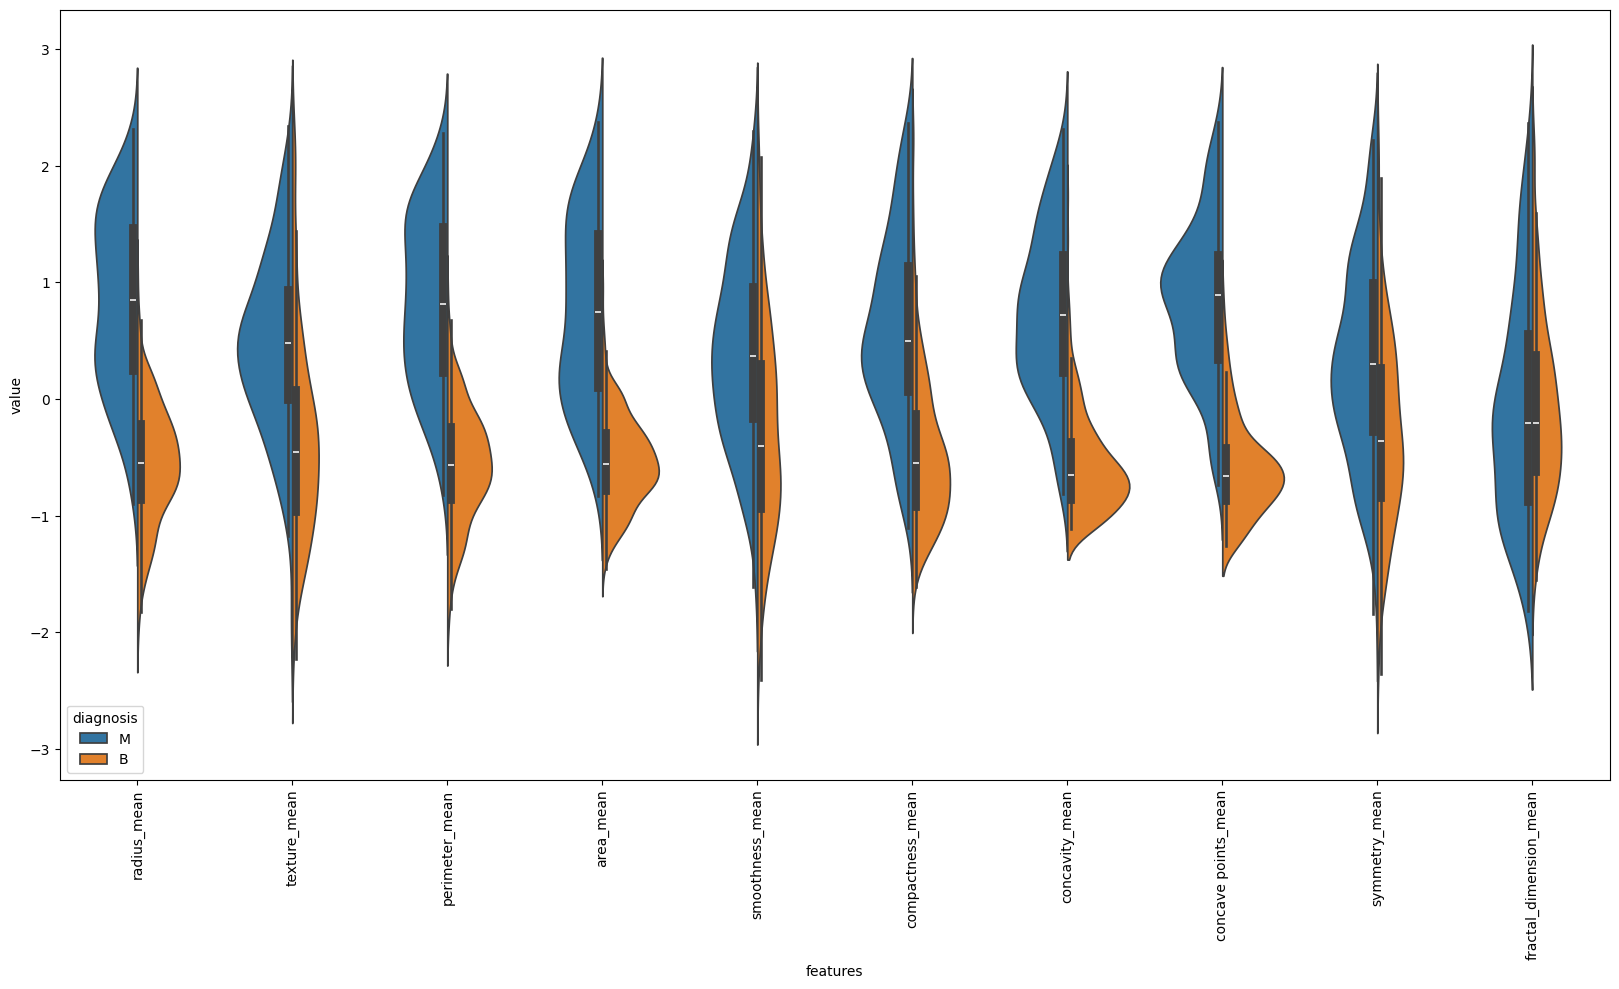

In [305]:
# after removing  most of the outliers , the data seems to be more in range to perform analysis and build a machine learning model on top of it ! now lets have look at the violin plot also ! 
plt.figure(figsize=(20,10))
sns.violinplot(data=filtered_df,x="features",y="value",hue="diagnosis",split=True,inner="box")
plt.xticks(rotation=90)
plt.show()

Violin plot also seems to be better than before :)

In [306]:
filtered_df.head()

diagnosis     features     value
0         M  radius_mean  1.097064
1         M  radius_mean  1.829821
2         M  radius_mean  1.579888
3         M  radius_mean -0.768909
4         M  radius_mean  1.750297

In [307]:
filtered_df["features"].value_counts()

features
texture_mean              560
smoothness_mean           560
radius_mean               557
perimeter_mean            556
area_mean                 555
fractal_dimension_mean    555
compactness_mean          554
symmetry_mean             554
concave points_mean       551
concavity_mean            550
Name: count, dtype: int64

In [308]:
first_ten_temp_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M     1.097064     -2.073335        1.269934   0.984375   
1         M     1.829821     -0.353632        1.685955   1.908708   
2         M     1.579888      0.456187        1.566503   1.558884   
3         M    -0.768909      0.253732       -0.592687  -0.764464   
4         M     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  fractal_dimension_mean  
0       2.217515                2.255747  
1       0.001392               -0.868652  
2       0.939685               -0.398008  
3       2.867383                4.910919  
4      -0.009560               -0.562450

Since, from the above swarm and violin plot , we now sure know that the column fractal_dimension_mean does not play a significant role in the building machine learning model , so we can remove it , but first lets check using selectKBest feature selection methods , which can help us get out of our doubts ! 

In [309]:
# splitting the data into dependent and independent variables 
x = first_ten_temp_df.iloc[:,1:]
y = first_ten_temp_df["diagnosis"]


<p>Removing Outliers USING IQR and Quantile methods  </p>

In [310]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean
columns_to_clean = ["radius_mean","texture_mean","perimeter_mean"	,"area_mean"	,"smoothness_mean","compactness_mean"	,"concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"]
cleaned_df = remove_outliers_iqr(x, columns_to_clean)

In [311]:
cleaned_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
5      -0.476375     -0.835335       -0.387148  -0.505650         2.237421   
6       1.170908      0.160649        1.138125   1.095295        -0.123136   
..           ...           ...             ...        ...              ...   
558     0.131416      0.788958        0.182100   0.006288        -0.827674   
559    -0.743348      1.079841       -0.718729  -0.714976        -0.266890   
560    -0.021952      1.829157       -0.024262  -0.154973         0.208495   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
4            0.539340        1.371011             1.428493      -0.009560   
5            1.244335        0.866302             0.824656       1.005402   
6            0.088295        0.300072             0.646935      -0.064325   
..                ...             ...                  ...            ...   
558          0.543131        0.177034            -0.298156      -1.305645   
559         -0.042470        0.281240            -0.202977      -1.546608   
560          0.156521       -0.554670            -0.151647      -1.002617   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   

     fractal_dimension_mean  
1                 -0.868652  
2                 -0.398008  
4                 -0.562450  
5                  1.890005  
6                 -0.762332  
..                      ...  
558               -0.188203  
559                0.411444  
560               -0.154180  
565               -1.058611  
566               -0.895587  

[502 rows x 10 columns]

<p>Now using feature selection process with selectKBest</p>

In [312]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=9)
x_new = selector.fit_transform(x, y)

In [313]:
selector.get_feature_names_out()

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'], dtype=object)

<p>Here as you can see that the fractal_dimension_mean has been ruled out,as predicted before while using selectKBest feature selection. Lets use f_classif to make sure ! </p>

In [314]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif,f_classif 
selector = SelectKBest(score_func=f_classif,k=9)
x_new = selector.fit_transform(x,y)

In [315]:
selector.get_feature_names_out()

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'], dtype=object)

<p>You can see it here too, the fractal_dimension_mean has been ruled out , hence it proved our points </p>
<p>But lets just find the best 5 features to work on from the first 10 features of the original dataset and predict the outcome using different classification algorithm ! </p>

#### USING MUTUAL_INFO_CLASSIF FROM SELECTKBEST

In [316]:
# from sklearn.feature_selection import SelectKBest,mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=5)
x_new_for_prediction = selector.fit_transform(x, y)

In [317]:
selector.get_feature_names_out()

array(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean'], dtype=object)

In [318]:
### PUTTING THOSE SELECTED FEATURES IN THE LIST 
selected_features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean']

In [319]:
### FILTERING THE COLUMNS WITH THE SELECTED FEATURES 
selected_new_x = x[selected_features]

In [320]:
selected_new_x

radius_mean  perimeter_mean  area_mean  concavity_mean  \
0       1.097064        1.269934   0.984375        2.652874   
1       1.829821        1.685955   1.908708       -0.023846   
2       1.579888        1.566503   1.558884        1.363478   
3      -0.768909       -0.592687  -0.764464        1.915897   
4       1.750297        1.776573   1.826229        1.371011   
..           ...             ...        ...             ...   
564     2.110995        2.060786   2.343856        1.947285   
565     1.704854        1.615931   1.723842        0.693043   
566     0.702284        0.672676   0.577953        0.046588   
567     1.838341        1.982524   1.735218        3.296944   
568    -1.808401       -1.814389  -1.347789       -1.114873   

     concave points_mean  
0               2.532475  
1               0.548144  
2               2.037231  
3               1.451707  
4               1.428493  
..                   ...  
564             2.320965  
565             1.263669  
566             0.105777  
567             2.658866  
568            -1.261820  

[569 rows x 5 columns]

<p>Since we have new top 5 selected features , we will starting using machine learning model on those datasets of new selected x_features and the outcomes(y)</p>

<p>We will also label the outcome of M and B to 0 And 1 for machine to understand such that we can create and plot graphs  </p>

In [321]:
x_train,x_test,y_train,y_test  = train_test_split(selected_new_x,y,random_state=42,test_size=0.2)

# LOGISTIC REGRESSION (FIRST)

In [322]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(selected_new_x,y)

LogisticRegression()

In [323]:
lr.score(x_test,y_test)

0.9298245614035088

In [324]:
lr.score(x_train,y_train)

0.9120879120879121

### PLOTTING METRICS FOR LOGISTIC REGRESSION 


In [325]:
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score,confusion_matrix

In [326]:
cm = confusion_matrix(y_test,lr.predict(x_test))

In [327]:
cm

array([[68,  3],
       [ 5, 38]], dtype=int64)

<Axes: >

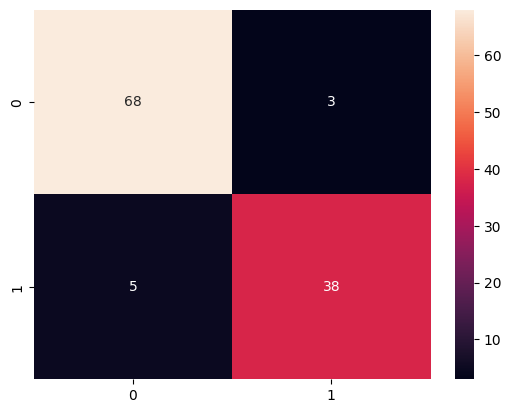

In [328]:
sns.heatmap(cm,annot=True,fmt=".2g")

In [329]:
ps = precision_score(y_test,lr.predict(x_test),pos_label="M") * 100

In [330]:
ps

92.6829268292683

In [331]:
rs = recall_score(y_test,lr.predict(x_test),pos_label="M") * 100

In [332]:
rs

88.37209302325581

In [333]:
fs = f1_score(y_test,lr.predict(x_test),pos_label="M") * 100

In [334]:
fs

90.47619047619048

#### PAIRPLOTTING THE NEWLY SELECTED_FEATURES

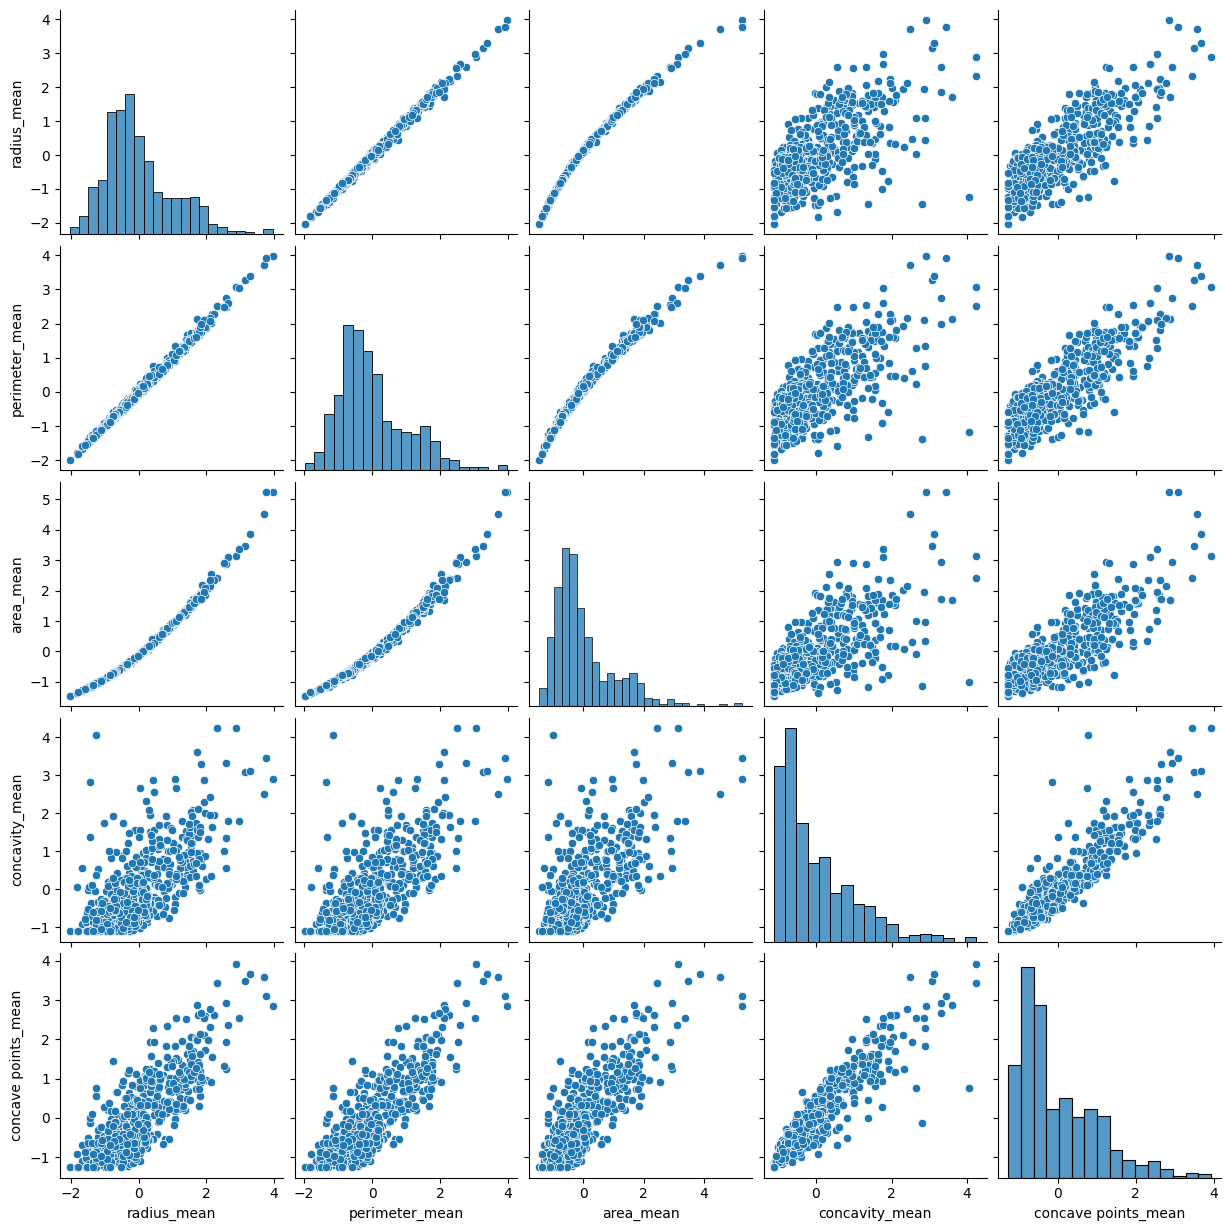

In [335]:
sns.pairplot(data=selected_new_x)
plt.show()

In [336]:
selected_new_x

radius_mean  perimeter_mean  area_mean  concavity_mean  \
0       1.097064        1.269934   0.984375        2.652874   
1       1.829821        1.685955   1.908708       -0.023846   
2       1.579888        1.566503   1.558884        1.363478   
3      -0.768909       -0.592687  -0.764464        1.915897   
4       1.750297        1.776573   1.826229        1.371011   
..           ...             ...        ...             ...   
564     2.110995        2.060786   2.343856        1.947285   
565     1.704854        1.615931   1.723842        0.693043   
566     0.702284        0.672676   0.577953        0.046588   
567     1.838341        1.982524   1.735218        3.296944   
568    -1.808401       -1.814389  -1.347789       -1.114873   

     concave points_mean  
0               2.532475  
1               0.548144  
2               2.037231  
3               1.451707  
4               1.428493  
..                   ...  
564             2.320965  
565             1.263669  
566             0.105777  
567             2.658866  
568            -1.261820  

[569 rows x 5 columns]

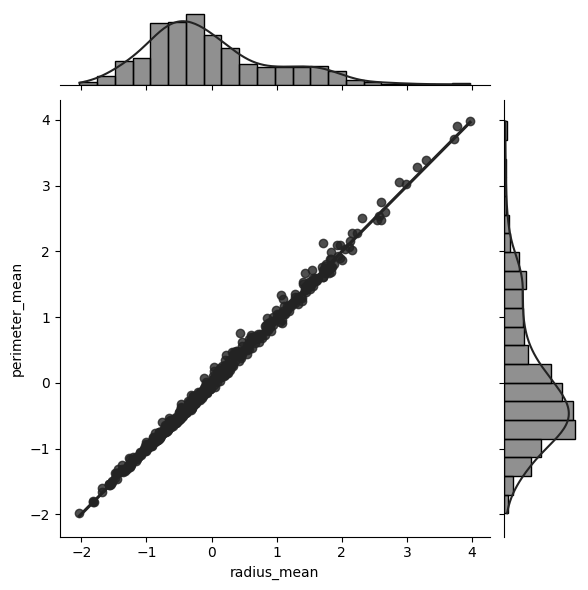

In [337]:
sns.jointplot(x=selected_new_x["radius_mean"], 
              y=selected_new_x["perimeter_mean"], 
              kind="reg",color="#232323")

#### USING SVC(SECOND)(LINEAR)

In [338]:
from sklearn.svm import SVC

In [339]:
svc  = SVC(kernel="linear")

In [340]:
svc.fit(selected_new_x,y)

SVC(kernel='linear')

In [341]:
svc.score(x_test,y_test)

0.9298245614035088

In [342]:
svc.score(x_train,y_train)

0.9098901098901099

<p>Using metric evaluation for SVC(linear)</p>

In [343]:
cm_svc = confusion_matrix(y_test,svc.predict(x_test))

<Axes: >

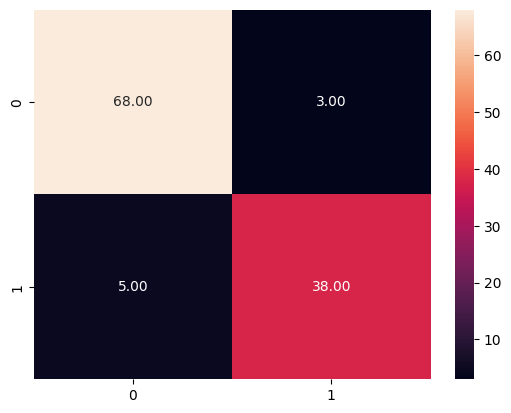

In [344]:
sns.heatmap(cm_svc,annot=True,fmt=".2f")

<p>Confusion metrics for SVC(linear) and Logistic Regression looks the same, lets try with polynomial </p>

In [345]:
svc_poly = SVC(kernel="poly")

In [346]:
svc_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [347]:
svc_poly.score(x_test,y_test)

0.8947368421052632

In [348]:
svc_poly.score(x_train,y_train)

0.8879120879120879

In [349]:
### plotting the confusion metrics 
cm_svc_poly = confusion_matrix(y_test,svc_poly.predict(x_test))

<Axes: >

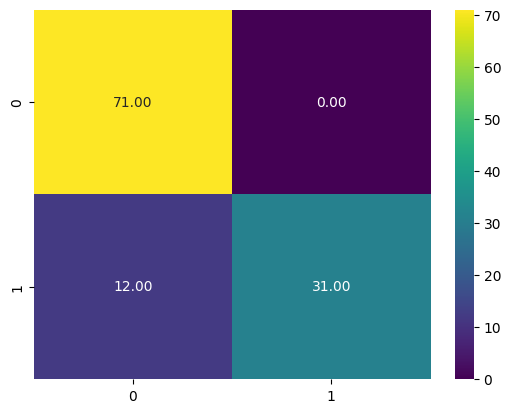

In [350]:
sns.heatmap(cm_svc_poly,annot=True,cmap='viridis',fmt=".2f")

In [351]:
precision_score(y_test,svc_poly.predict(x_test),pos_label="M")*100

100.0

In [352]:
recall_score(y_test,svc_poly.predict(x_test),pos_label="M")*100

72.09302325581395

In [353]:
accuracy_score(y_test,svc_poly.predict(x_test))*100

89.47368421052632

#### USING SVC(RBF)

In [354]:
svc_rbf = SVC(kernel="rbf")

In [355]:
svc_rbf.fit(x_train,y_train)

SVC()

In [356]:
svc_rbf.score(x_test,y_test)

0.9298245614035088

In [357]:
svc_rbf.score(x_train,y_train)

0.9274725274725275

In [358]:
######### WOW ! LOOK AT THAT ...re ! 
cm_rbf = confusion_matrix(y_test,svc_rbf.predict(x_test))

<Axes: >

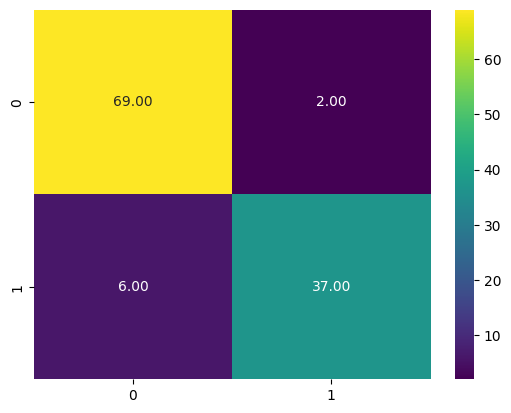

In [359]:
sns.heatmap(cm_rbf,annot=True,fmt=".2f",cmap="viridis")

<p>Here, B is mapped as 0 and M is mapped as 1 from the diagnosis column. This is auto done. Now, From this confusion matrix , lets evaluate some stuffs.</p>

*  True Negative is 69, meaning that the total number of correctly predicted Benign Tumor number is 69 out of 71, 
* False Positive is 2, meaning that 2 out of 71 data were predicted as Malignant which was supposed to be Benign
* False Negative is 6, meaning that 6 out of 43 Malignant tumor were predicted as benign but was malignant tumor.
* True positive is 37 , meaning that a total of 37 data was predicted as Malignant out of 46 Malignant tumor

#### USING DECISION TREE FOR BUILDING MODEL (THIRD ALGORITHM)

In [360]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [361]:
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [362]:

dc.score(x_test,y_test),dc.score(x_train,y_train)
#this is giving us overfitting model , lets try using entropy criterion

(0.9210526315789473, 1.0)

In [363]:
dc1 = DecisionTreeClassifier(criterion="entropy")
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [364]:
dc1.score(x_test,y_test),dc1.score(x_train,y_train)
# this too is giving us overfitting model !  So now , let's try with different max_depths

(0.9473684210526315, 1.0)

In [365]:
dc_depth = DecisionTreeClassifier(max_depth =5)
dc_depth.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [366]:
dc_depth.score(x_test,y_test),dc_depth.score(x_train,y_train)
# still giving us overfitting model, lets use for loop to check for the correct depth ! 

(0.9298245614035088, 0.9758241758241758)

In [367]:

def checkingDepthOFDecisionTree(x_train,y_train):
    for i in range(1,21):
        dc_looped = DecisionTreeClassifier(max_depth=i)
        dc_looped.fit(x_train,y_train)
        print(dc_looped.score(x_test,y_test),dc_looped.score(x_train,y_train))


checkingDepthOFDecisionTree(x_train,y_train)


0.8947368421052632 0.9208791208791208
0.9122807017543859 0.9252747252747253
0.8859649122807017 0.9428571428571428
0.9298245614035088 0.9582417582417583
0.9298245614035088 0.9758241758241758
0.9122807017543859 0.989010989010989
0.9035087719298246 0.9956043956043956
0.8859649122807017 1.0
0.8859649122807017 1.0
0.9298245614035088 1.0
0.9210526315789473 1.0
0.8947368421052632 1.0
0.9035087719298246 1.0
0.8947368421052632 1.0
0.9122807017543859 1.0
0.9035087719298246 1.0
0.8947368421052632 1.0
0.9210526315789473 1.0
0.9298245614035088 1.0
0.9035087719298246 1.0


<p>Here, the most feasible solution seems to be max_depth 2 , so we will use it </p>


In [368]:
dc_acc = DecisionTreeClassifier(max_depth = 2)
dc_acc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [369]:
dc_acc.score(x_train,y_train),dc_acc.score(x_test,y_test)

(0.9252747252747253, 0.9122807017543859)

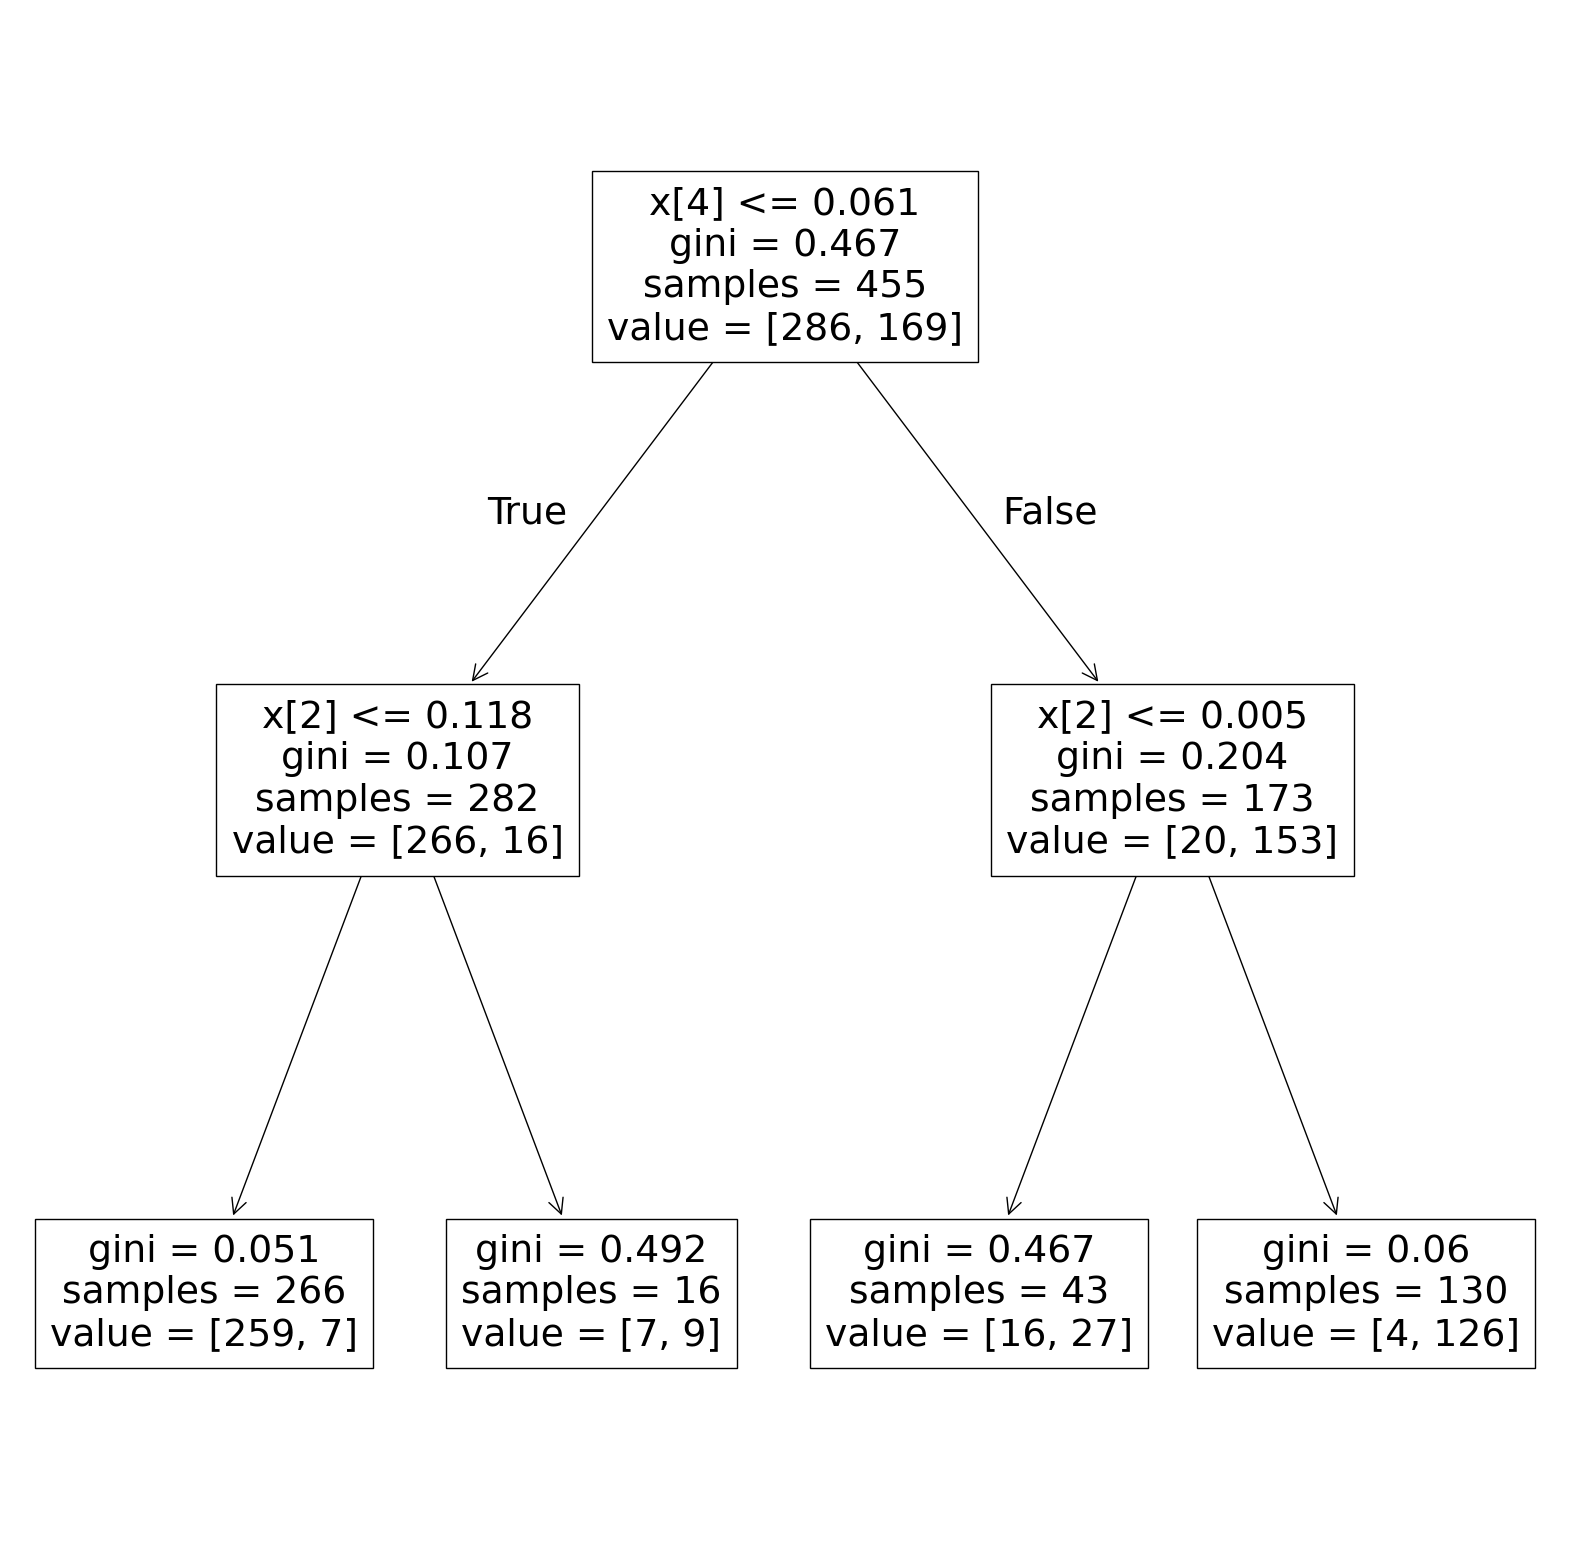

In [370]:
plt.figure(figsize=(20,20))
plot_tree(dc_acc)
# plt.savefig("demo_max_depth_2.jpg")
plt.show()

In [371]:
dc_acc1 = DecisionTreeClassifier(max_depth = 2,criterion="entropy")
dc_acc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [372]:
dc_acc1.score(x_train,y_train),dc_acc1.score(x_test,y_test)

(0.9252747252747253, 0.9122807017543859)

In [373]:
### we are using dc_acc for confusion matrix 

In [374]:
cm_dc_acc = confusion_matrix(y_test,dc_acc.predict(x_test))

<Axes: >

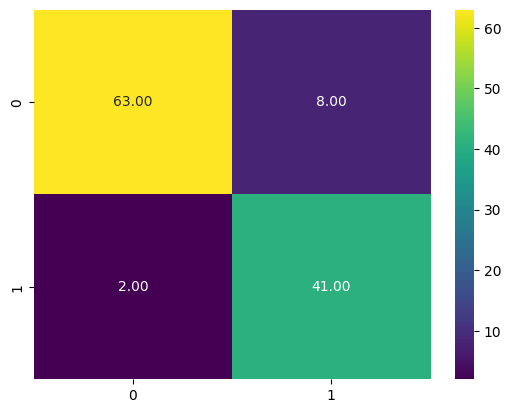

In [375]:
sns.heatmap(cm_dc_acc,annot=True,fmt=".2f",cmap="viridis")

#### NAIVE BAYES(4th algorithm) Gaussian NB

In [376]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [377]:
gnb.score(x_test,y_test),gnb.score(x_train,y_train)

(0.956140350877193, 0.9054945054945055)

In [378]:
cm_gnb = confusion_matrix(y_test,gnb.predict(x_test))

<Axes: >

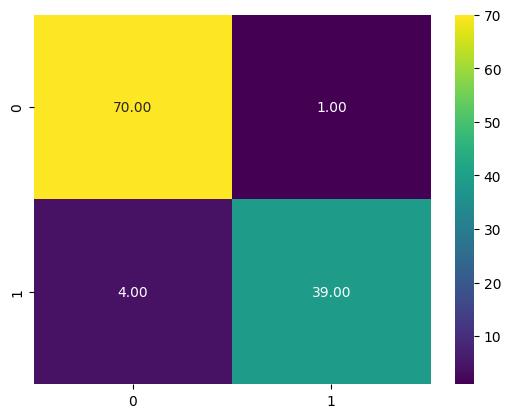

In [379]:
sns.heatmap(cm_gnb,annot=True,fmt='.2f',cmap="viridis")

In [380]:
precision_score(y_test,gnb.predict(x_test),pos_label="M")

0.975

In [381]:
recall_score(y_test,gnb.predict(x_test),pos_label="M")

0.9069767441860465

In [382]:
accuracy_score(y_test,gnb.predict(x_test))

0.956140350877193

#### RANDOM FOREST CLASSIFIER 

In [383]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [384]:
rfc.score(x_train,y_train),rfc.score(x_test,y_test)
#oops ! looks like the model is overfitting, lets check the confusion matrix of this overfitting data to see how it looks like. IK, just wasting my time :)

(1.0, 0.9385964912280702)

In [385]:
cm_rfc = confusion_matrix(y_test,rfc.predict(x_test))

<Axes: >

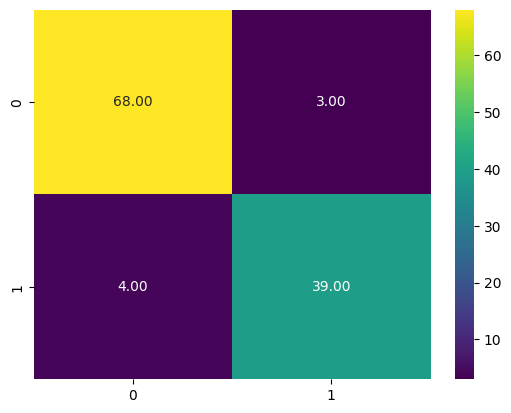

In [386]:
sns.heatmap(cm_rfc,annot=True,fmt='.2f',cmap="viridis")

<p>Well the confusion matrix looks well, but overfitting is overfitting , so what do we do now, maybe hyperparater tuning ? </p>

In [387]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf1 = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf1, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D5F941CFA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D5FA500370>})

In [388]:
best_rf = rand_search.best_estimator_
rand_search.best_params_

{'max_depth': 15, 'n_estimators': 486}

<p>We have got the best_params, now lets use in the algorithm and try it ! </p> 

In [389]:
rf_best = RandomForestClassifier(max_depth=12,n_estimators=296)
rf_best.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=296)

In [390]:
rf_best.score(x_train,y_train),rf_best.score(x_test,y_test)
### maybe the issue here is feature selection , as we know that we have selected five best features using selectKBest, or something , this overfitting model has a 6% drop , which is kind of mild to be honest , so let's moveon! maybe we will solve this another day 

(1.0, 0.9385964912280702)

#### KNN (FINAL ALGORITHM !)

In [391]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train,y_train)
knc.score(x_test,y_test),knc.score(x_train,y_train)


### OKAY, here seems a bit of overfitting, so lets use looping to change the n_neighbors value ! 

(0.9473684210526315, 0.9582417582417583)

In [392]:
def checkingForBestFitModelKNN():
    for i in range(1,51):
        knc1 = KNeighborsClassifier(n_neighbors=i)
        knc1.fit(x_train,y_train)
        print(i,knc1.score(x_test,y_test),knc1.score(x_train,y_train),knc1.score(x_test,y_test)-knc1.score(x_train,y_train))

checkingForBestFitModelKNN()

1 0.9210526315789473 1.0 -0.07894736842105265
2 0.9298245614035088 0.9516483516483516 -0.021823790244842822
3 0.9473684210526315 0.9582417582417583 -0.010873337189126753
4 0.9210526315789473 0.9406593406593406 -0.019606709080393303
5 0.9298245614035088 0.9362637362637363 -0.006439174860227492
6 0.9298245614035088 0.9318681318681319 -0.0020435704646231123
7 0.956140350877193 0.9318681318681319 0.02427221900906107
8 0.9473684210526315 0.9362637362637363 0.011104684788895258
9 0.9649122807017544 0.9296703296703297 0.03524195103142469
10 0.956140350877193 0.9340659340659341 0.02207441681125888
11 0.956140350877193 0.9296703296703297 0.02647002120686326
12 0.956140350877193 0.9296703296703297 0.02647002120686326
13 0.956140350877193 0.9252747252747253 0.03086562560246764
14 0.956140350877193 0.9296703296703297 0.02647002120686326
15 0.956140350877193 0.9230769230769231 0.03306342780026983
16 0.9473684210526315 0.9274725274725275 0.019895893580104018
17 0.956140350877193 0.9230769230769231 0

<p>Okay, so here we are selection index number 45 , i.e. n_neighbors = 45 </p>

In [393]:
# so implementing KNN algorithm , 
knn_best  = KNeighborsClassifier(n_neighbors=45)
knn_best.fit(x_train,y_train)
knn_best.score(x_train,y_train),knn_best.score(x_test,y_test)

(0.9252747252747253, 0.9298245614035088)

In [394]:
### CONFUSION MATRIX FOR THIS ! 
cm_knn_best  = confusion_matrix(y_test,knn_best.predict(x_test))

<Axes: >

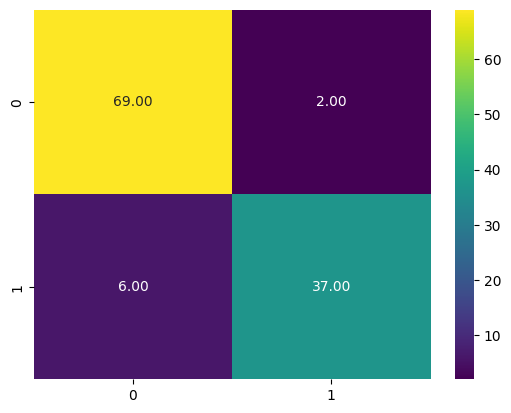

In [395]:
sns.heatmap(cm_knn_best,annot=True,fmt=".2f",cmap="viridis")

#### NOW CALCULATING FOR ANOTHER 10 DATASET

In [396]:
second_ten_temp_df = pd.concat([y,scaled_x.iloc[:,10:20]],axis=1)

In [397]:
second_ten_temp_df

diagnosis  radius_se  texture_se  perimeter_se   area_se  smoothness_se  \
0           M   2.489734   -0.565265      2.833031  2.487578      -0.214002   
1           M   0.499255   -0.876244      0.263327  0.742402      -0.605351   
2           M   1.228676   -0.780083      0.850928  1.181336      -0.297005   
3           M   0.326373   -0.110409      0.286593 -0.288378       0.689702   
4           M   1.270543   -0.790244      1.273189  1.190357       1.483067   
..        ...        ...         ...           ...       ...            ...   
564         M   2.782080    0.071025      2.379583  2.604187       1.086384   
565         M   1.300499    2.260938      1.156857  1.291565      -0.424010   
566         M   0.184892   -0.257371      0.276693  0.180698      -0.379342   
567         M   1.157935    0.686088      1.438530  1.009503      -0.173000   
568         B  -0.070279    0.383092     -0.157449 -0.466152       0.049342   

     compactness_se  concavity_se  concave points_se  symmetry_se  \
0          1.316862      0.724026           0.660820     1.148757   
1         -0.692926     -0.440780           0.260162    -0.805450   
2          0.814974      0.213076           1.424827     0.237036   
3          2.744280      0.819518           1.115007     4.732680   
4         -0.048520      0.828471           1.144205    -0.361092   
..              ...           ...                ...          ...   
564        0.191805      0.666001           2.067178    -1.138416   
565       -0.069758      0.252202           0.808431    -0.189161   
566        0.661277      0.510827           0.612157    -0.891416   
567        2.017716      1.302285           0.785721     0.326634   
568       -1.163516     -1.057501          -1.913447     0.752830   

     fractal_dimension_se  
0                0.907083  
1               -0.099444  
2                0.293559  
3                2.047511  
4                0.499328  
..                    ...  
564              0.167980  
565             -0.490556  
566              0.036727  
567              0.904057  
568             -0.382754  

[569 rows x 11 columns]

<p>Melting this dataset too ! </p>

In [398]:
second_melted_df = pd.melt(second_ten_temp_df,id_vars="diagnosis",var_name="features")

In [399]:
second_melted_df

diagnosis              features     value
0            M             radius_se  2.489734
1            M             radius_se  0.499255
2            M             radius_se  1.228676
3            M             radius_se  0.326373
4            M             radius_se  1.270543
...        ...                   ...       ...
5685         M  fractal_dimension_se  0.167980
5686         M  fractal_dimension_se -0.490556
5687         M  fractal_dimension_se  0.036727
5688         M  fractal_dimension_se  0.904057
5689         B  fractal_dimension_se -0.382754

[5690 rows x 3 columns]

<p>Plotting scatter plot and swarm plot in second_melted_df</p>

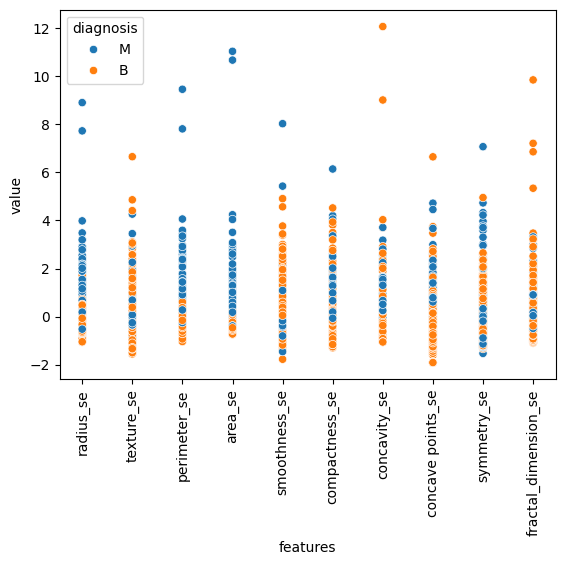

In [400]:
sns.scatterplot(data=second_melted_df,x="features",y="value",hue="diagnosis")
plt.xticks(rotation=90)
plt.show()

#### SWARMPLOT

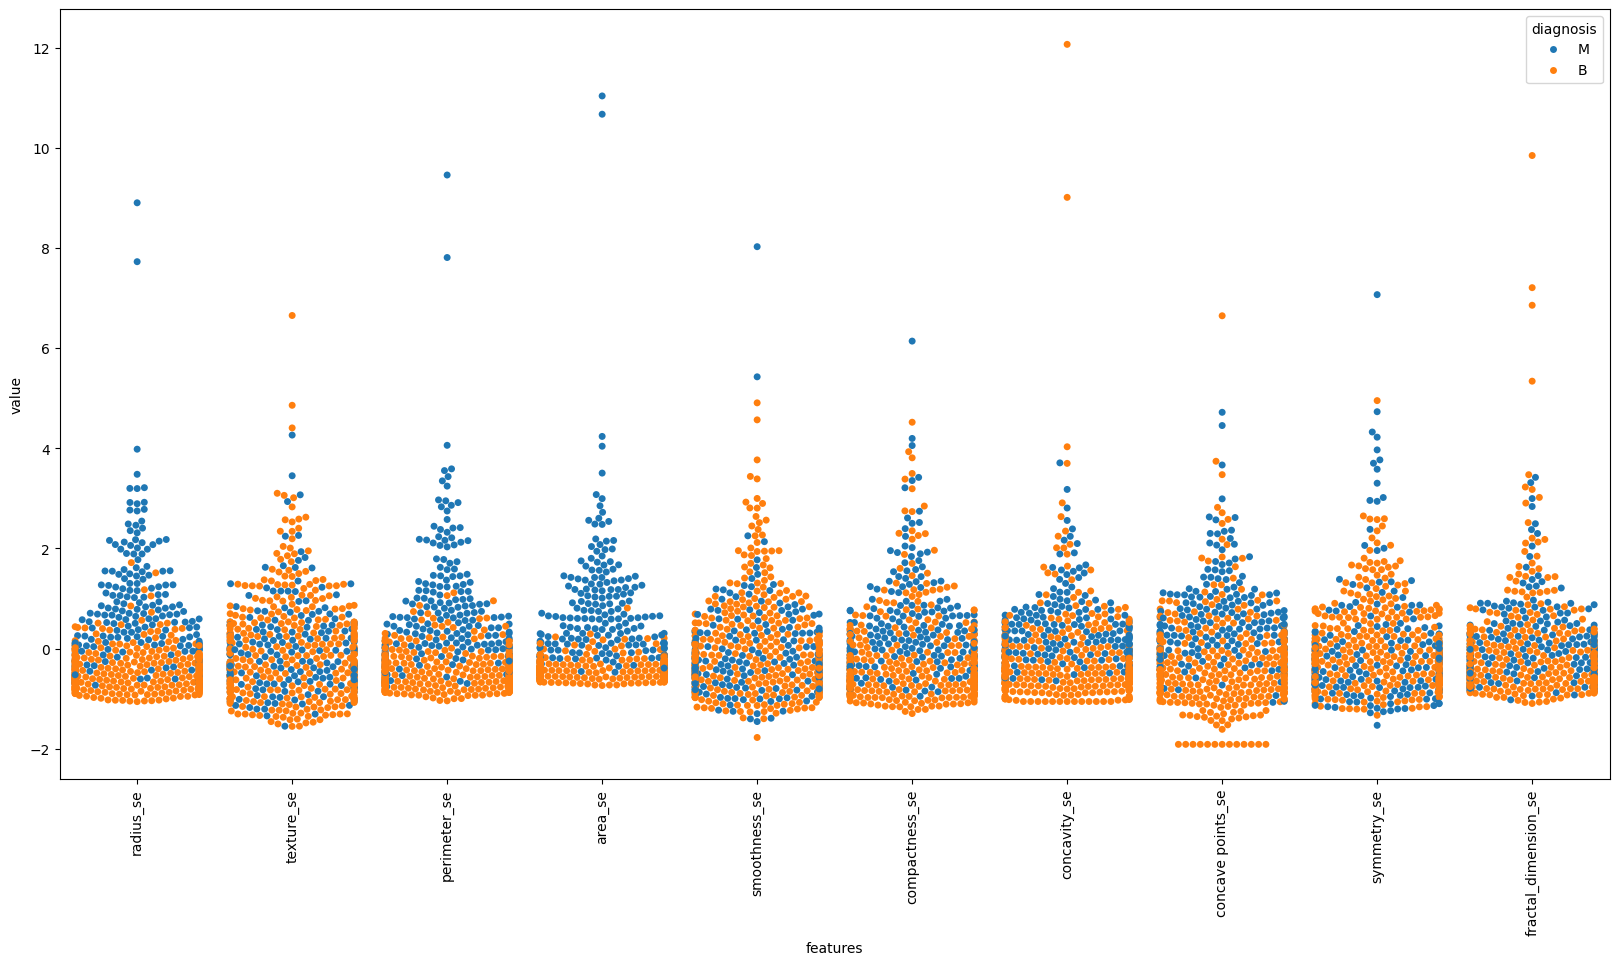

In [403]:
plt.figure(figsize=(20,10))
sns.swarmplot(data=second_melted_df,x="features",y="value",hue="diagnosis")
# plt.yticks()
plt.xticks(rotation=90)
plt.show()

<p>Now using boxplot graph and violin plot graph trying to  figure out the outliers </p>

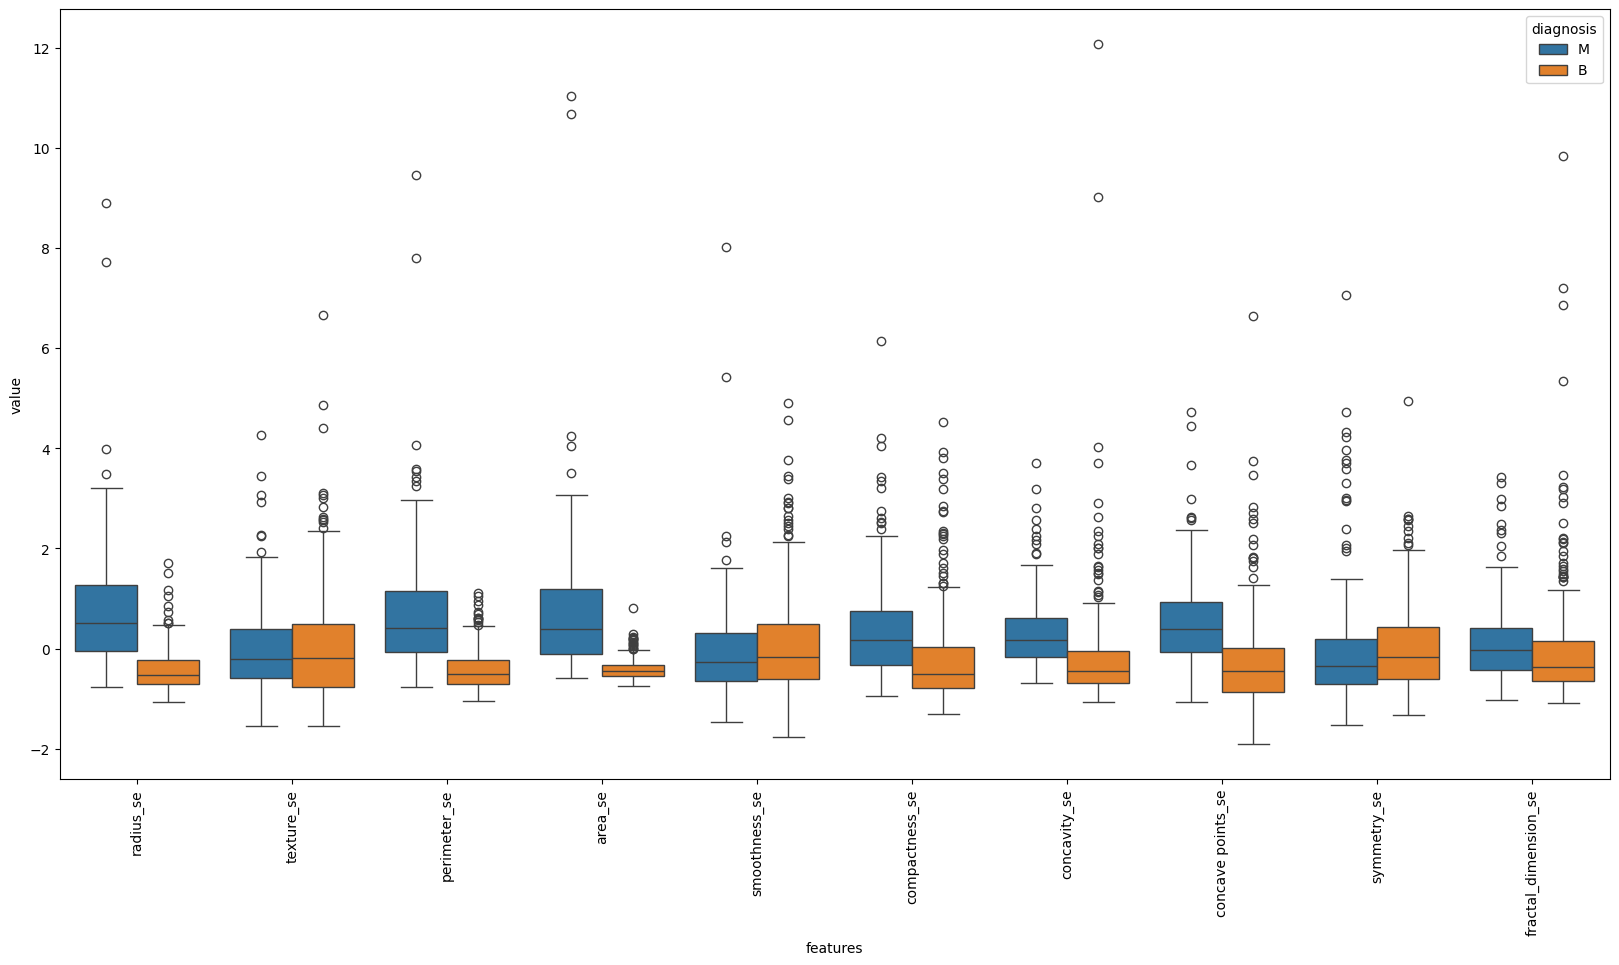

In [407]:
plt.figure(figsize=(20,10))
sns.boxplot(data=second_melted_df,x="features",y="value",hue="diagnosis")
plt.xticks(rotation=90)
plt.show()

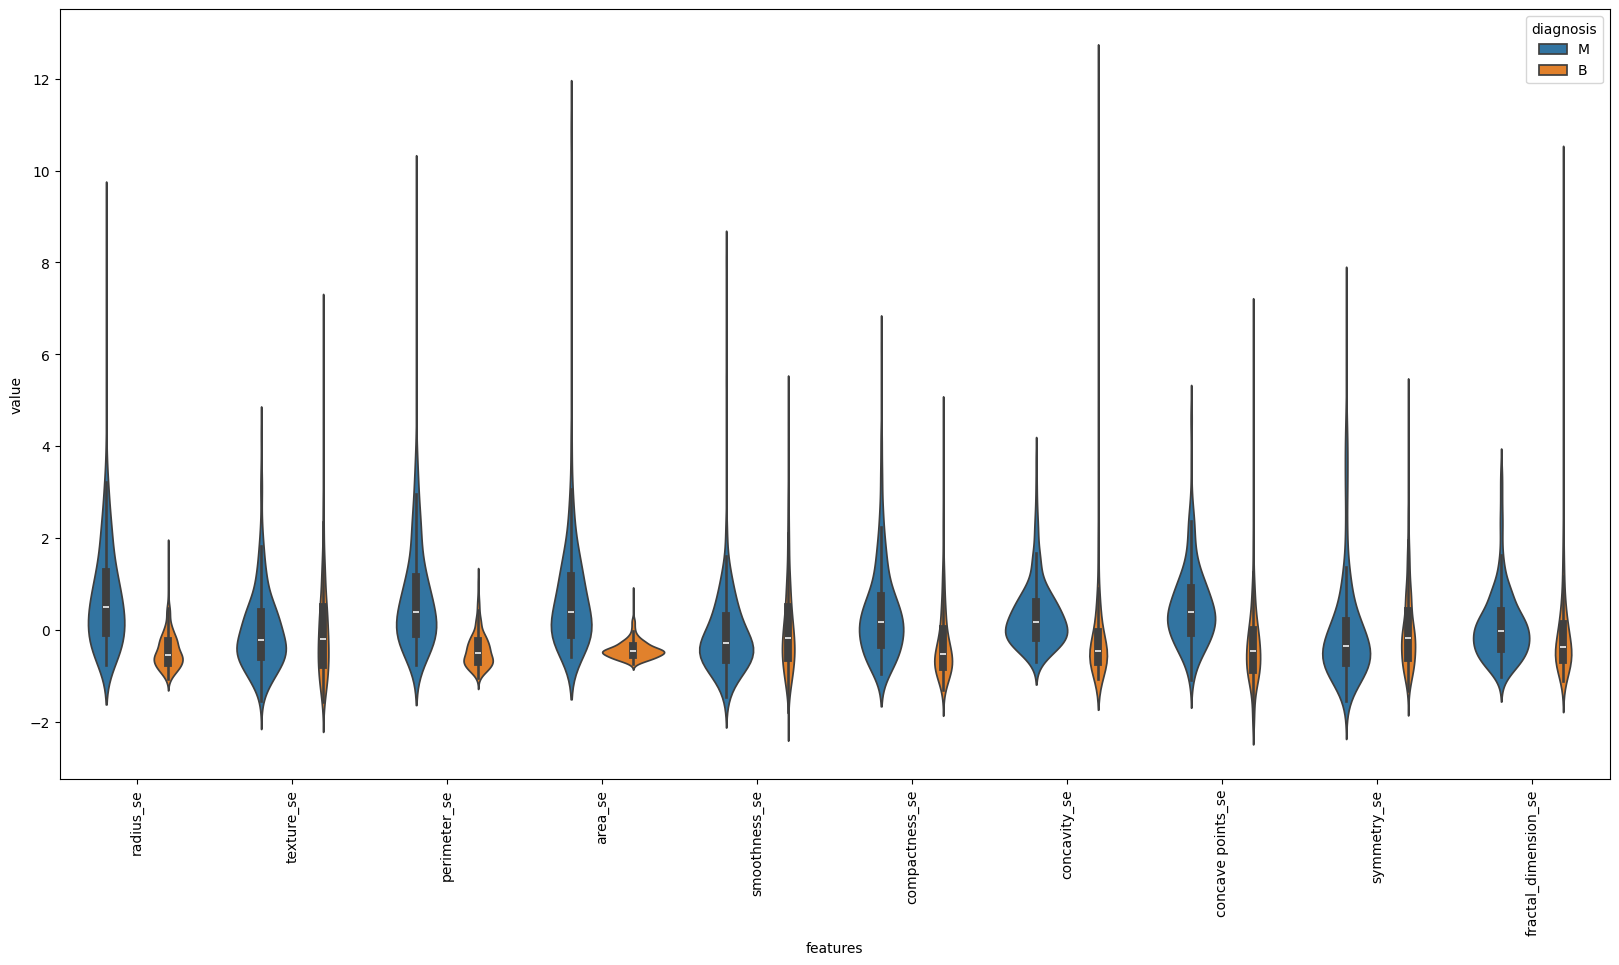

In [408]:
plt.figure(figsize=(20,10))
sns.violinplot(data=second_melted_df,x="features",y="value",hue="diagnosis")
plt.xticks(rotation=90)
plt.show()

<p>Look at those outliers damn ! Alright , Let's remove it ~ </p> But first lets pairplot ~ 


In [418]:
second_ten_temp_df

diagnosis  radius_se  texture_se  perimeter_se   area_se  smoothness_se  \
0           M   2.489734   -0.565265      2.833031  2.487578      -0.214002   
1           M   0.499255   -0.876244      0.263327  0.742402      -0.605351   
2           M   1.228676   -0.780083      0.850928  1.181336      -0.297005   
3           M   0.326373   -0.110409      0.286593 -0.288378       0.689702   
4           M   1.270543   -0.790244      1.273189  1.190357       1.483067   
..        ...        ...         ...           ...       ...            ...   
564         M   2.782080    0.071025      2.379583  2.604187       1.086384   
565         M   1.300499    2.260938      1.156857  1.291565      -0.424010   
566         M   0.184892   -0.257371      0.276693  0.180698      -0.379342   
567         M   1.157935    0.686088      1.438530  1.009503      -0.173000   
568         B  -0.070279    0.383092     -0.157449 -0.466152       0.049342   

     compactness_se  concavity_se  concave points_se  symmetry_se  \
0          1.316862      0.724026           0.660820     1.148757   
1         -0.692926     -0.440780           0.260162    -0.805450   
2          0.814974      0.213076           1.424827     0.237036   
3          2.744280      0.819518           1.115007     4.732680   
4         -0.048520      0.828471           1.144205    -0.361092   
..              ...           ...                ...          ...   
564        0.191805      0.666001           2.067178    -1.138416   
565       -0.069758      0.252202           0.808431    -0.189161   
566        0.661277      0.510827           0.612157    -0.891416   
567        2.017716      1.302285           0.785721     0.326634   
568       -1.163516     -1.057501          -1.913447     0.752830   

     fractal_dimension_se  
0                0.907083  
1               -0.099444  
2                0.293559  
3                2.047511  
4                0.499328  
..                    ...  
564              0.167980  
565             -0.490556  
566              0.036727  
567              0.904057  
568             -0.382754  

[569 rows x 11 columns]

<Figure size 2000x1000 with 0 Axes>

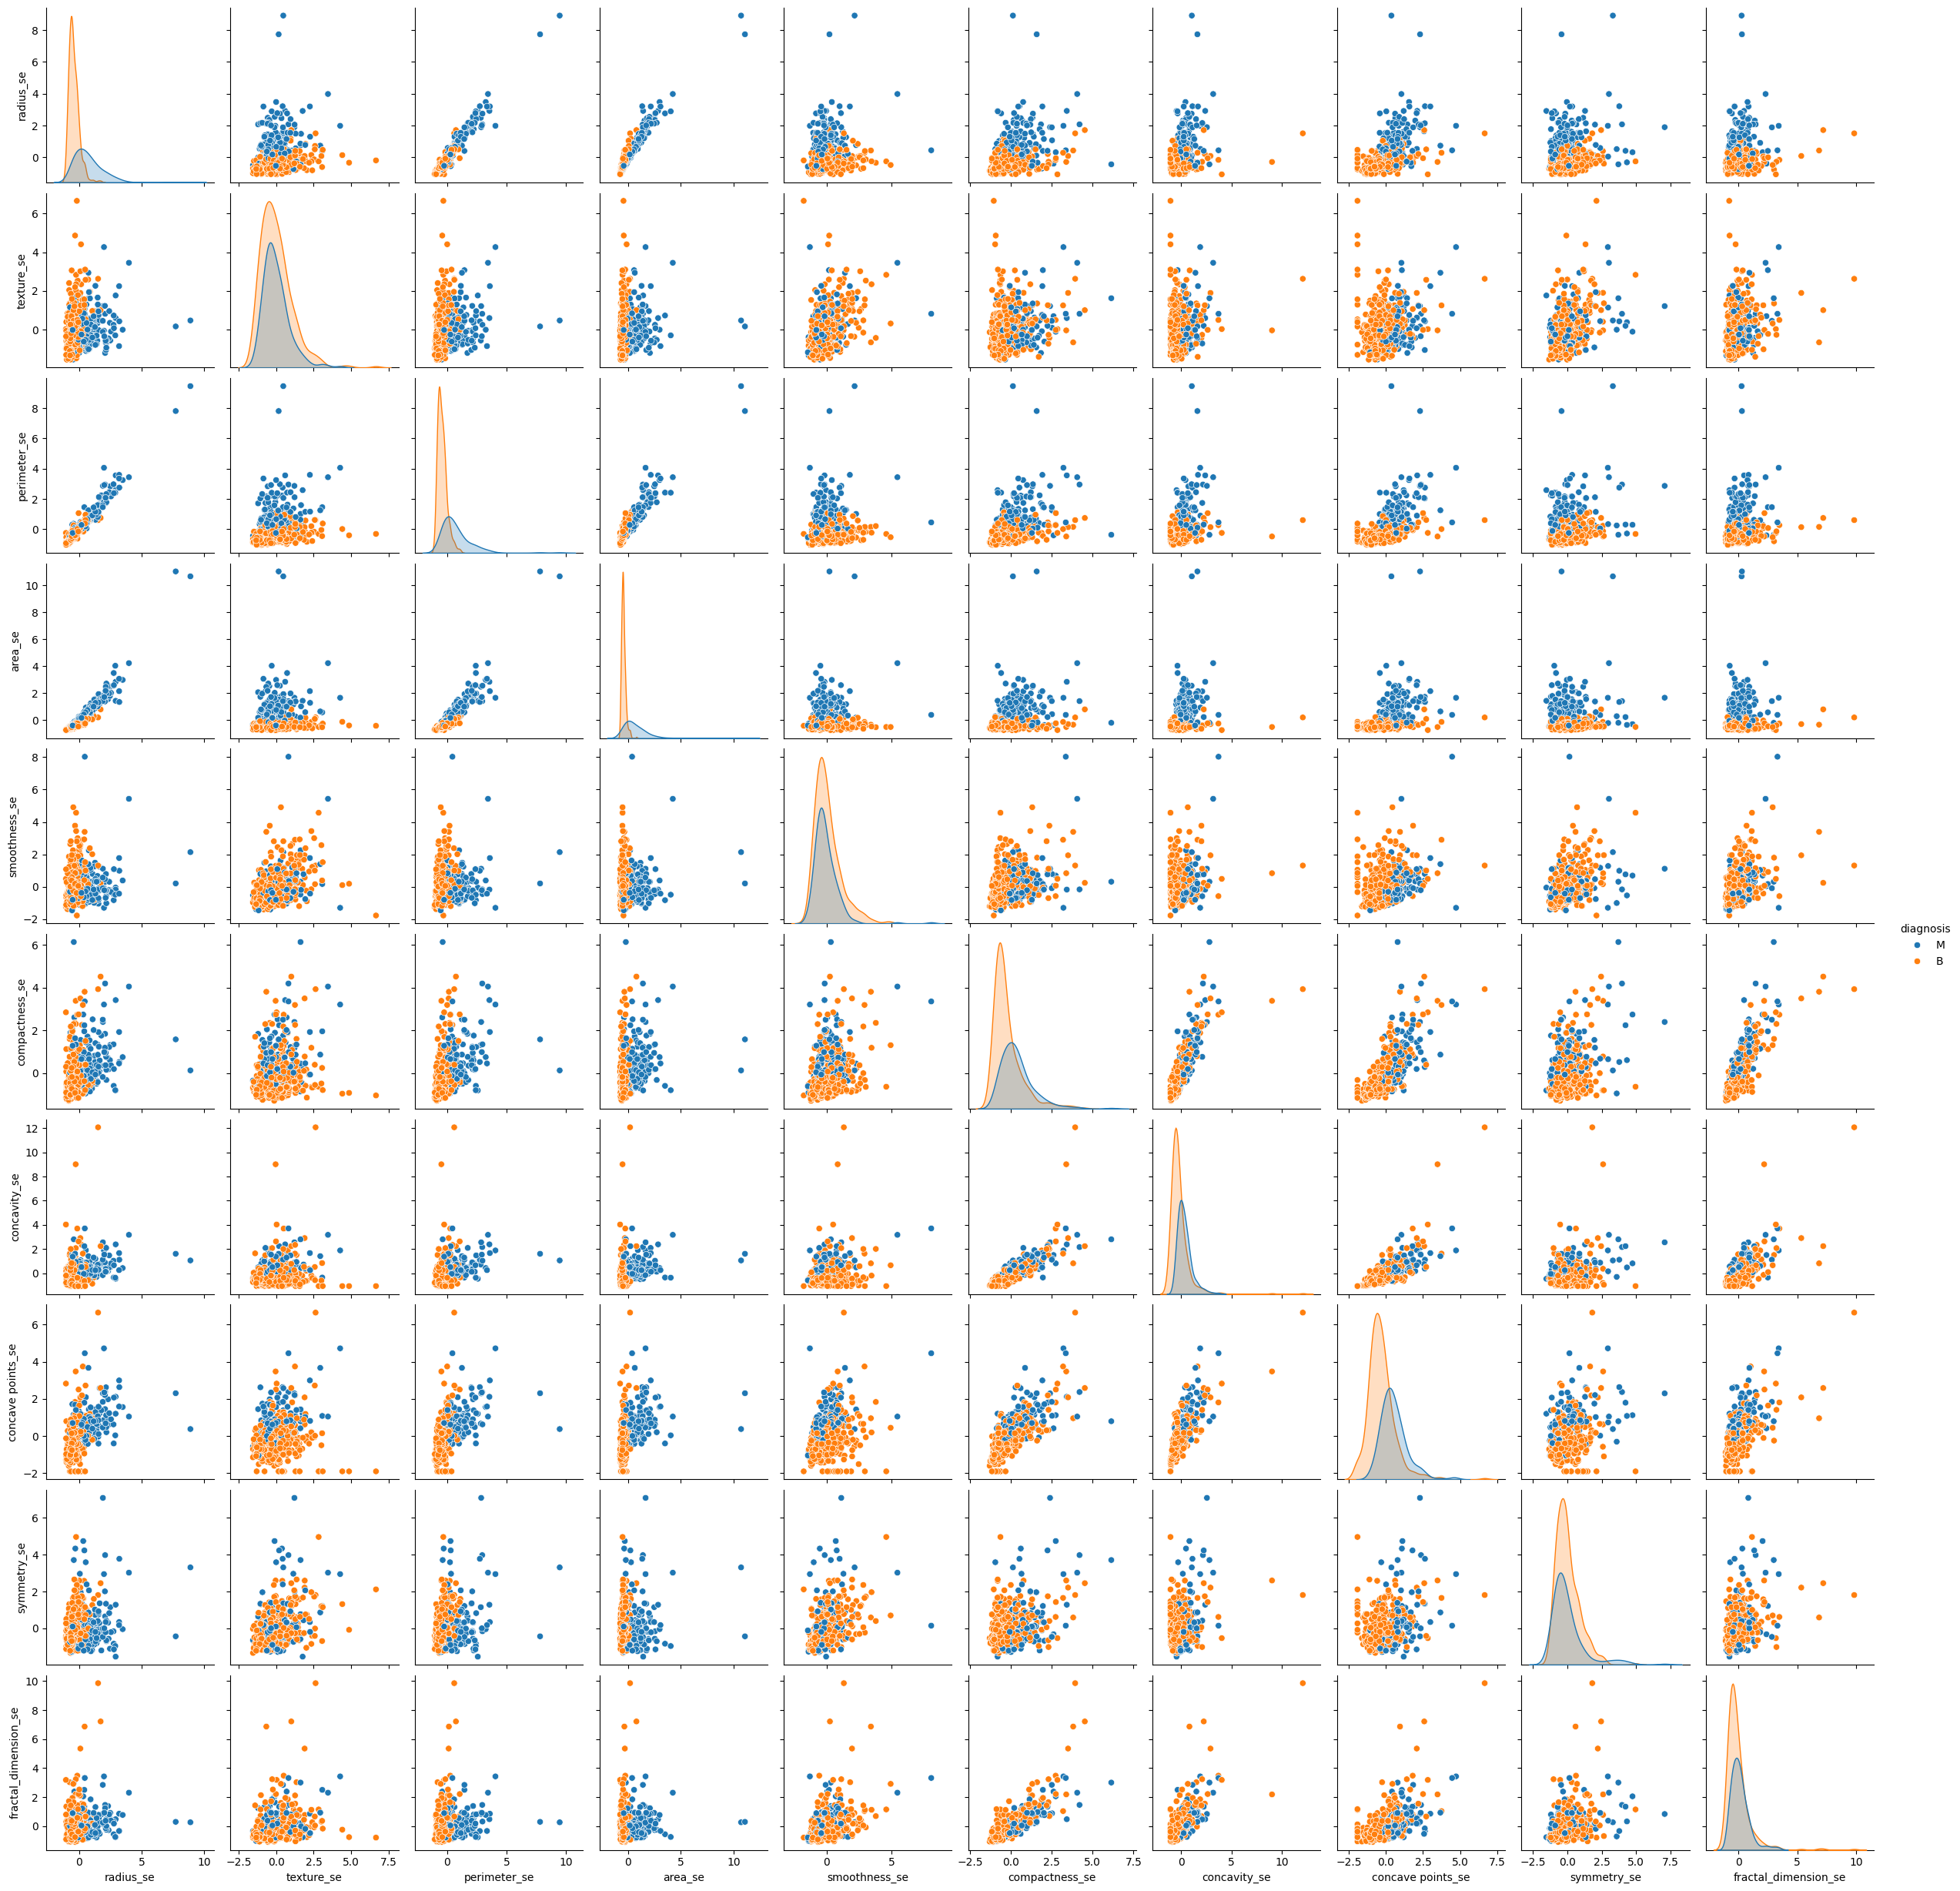

In [419]:
plt.figure(figsize=(20,10))
sns.pairplot(data=second_ten_temp_df,hue="diagnosis")
plt.show()

<p>Now, lets remove the outliers and perform feature selection on it ! </p>
But, first , let's split the data , shall we ? 

In [421]:
x = second_ten_temp_df.iloc[:,1:]
y = second_ten_temp_df["diagnosis"]

In [424]:
x

radius_se  texture_se  perimeter_se   area_se  smoothness_se  \
0     2.489734   -0.565265      2.833031  2.487578      -0.214002   
1     0.499255   -0.876244      0.263327  0.742402      -0.605351   
2     1.228676   -0.780083      0.850928  1.181336      -0.297005   
3     0.326373   -0.110409      0.286593 -0.288378       0.689702   
4     1.270543   -0.790244      1.273189  1.190357       1.483067   
..         ...         ...           ...       ...            ...   
564   2.782080    0.071025      2.379583  2.604187       1.086384   
565   1.300499    2.260938      1.156857  1.291565      -0.424010   
566   0.184892   -0.257371      0.276693  0.180698      -0.379342   
567   1.157935    0.686088      1.438530  1.009503      -0.173000   
568  -0.070279    0.383092     -0.157449 -0.466152       0.049342   

     compactness_se  concavity_se  concave points_se  symmetry_se  \
0          1.316862      0.724026           0.660820     1.148757   
1         -0.692926     -0.440780           0.260162    -0.805450   
2          0.814974      0.213076           1.424827     0.237036   
3          2.744280      0.819518           1.115007     4.732680   
4         -0.048520      0.828471           1.144205    -0.361092   
..              ...           ...                ...          ...   
564        0.191805      0.666001           2.067178    -1.138416   
565       -0.069758      0.252202           0.808431    -0.189161   
566        0.661277      0.510827           0.612157    -0.891416   
567        2.017716      1.302285           0.785721     0.326634   
568       -1.163516     -1.057501          -1.913447     0.752830   

     fractal_dimension_se  
0                0.907083  
1               -0.099444  
2                0.293559  
3                2.047511  
4                0.499328  
..                    ...  
564              0.167980  
565             -0.490556  
566              0.036727  
567              0.904057  
568             -0.382754  

[569 rows x 10 columns]

In [425]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean
columns_to_clean = ["radius_se","texture_se","perimeter_se"	,"area_se"	,"smoothness_se","compactness_se"	,"concavity_se","concave points_se","symmetry_se","fractal_dimension_se"]
cleaned_df = remove_outliers_iqr(x, columns_to_clean)

In [426]:
cleaned_df

radius_se  texture_se  perimeter_se   area_se  smoothness_se  \
1     0.499255   -0.876244      0.263327  0.742402      -0.605351   
5    -0.255070   -0.592662     -0.321304 -0.289258       0.156347   
6     0.149883   -0.804940      0.155410  0.298627      -0.909030   
7     0.643623    0.290561      0.490051  0.233722       0.588031   
8    -0.356850   -0.389818     -0.227743 -0.352403      -0.436677   
..         ...         ...           ...       ...            ...   
558  -0.648835   -0.197498     -0.317839 -0.457571      -0.933031   
560  -0.146794    0.499211      0.010861 -0.230954       0.071677   
562  -0.523235   -0.021506     -0.249525 -0.389146      -0.805359   
566   0.184892   -0.257371      0.276693  0.180698      -0.379342   
568  -0.070279    0.383092     -0.157449 -0.466152       0.049342   

     compactness_se  concavity_se  concave points_se  symmetry_se  \
1         -0.692926     -0.440780           0.260162    -0.805450   
5          0.445544      0.160025          -0.069124     0.134119   
6         -0.651568     -0.310141          -0.228089    -0.829666   
7          0.268933     -0.232554           0.435349    -0.688004   
8          0.533290      0.120568           0.075243     0.107482   
..              ...           ...                ...          ...   
558        1.168754      1.123568           0.691640    -0.503965   
560        0.072760     -0.370819           0.724082     0.031202   
562        1.283328      1.382525           0.694884     0.100217   
566        0.661277      0.510827           0.612157    -0.891416   
568       -1.163516     -1.057501          -1.913447     0.752830   

     fractal_dimension_se  
1               -0.099444  
5                0.486846  
6               -0.611218  
7                0.611669  
8               -0.017363  
..                    ...  
558              0.231148  
560              0.570818  
562              0.887792  
566              0.036727  
568             -0.382754  

[432 rows x 10 columns]

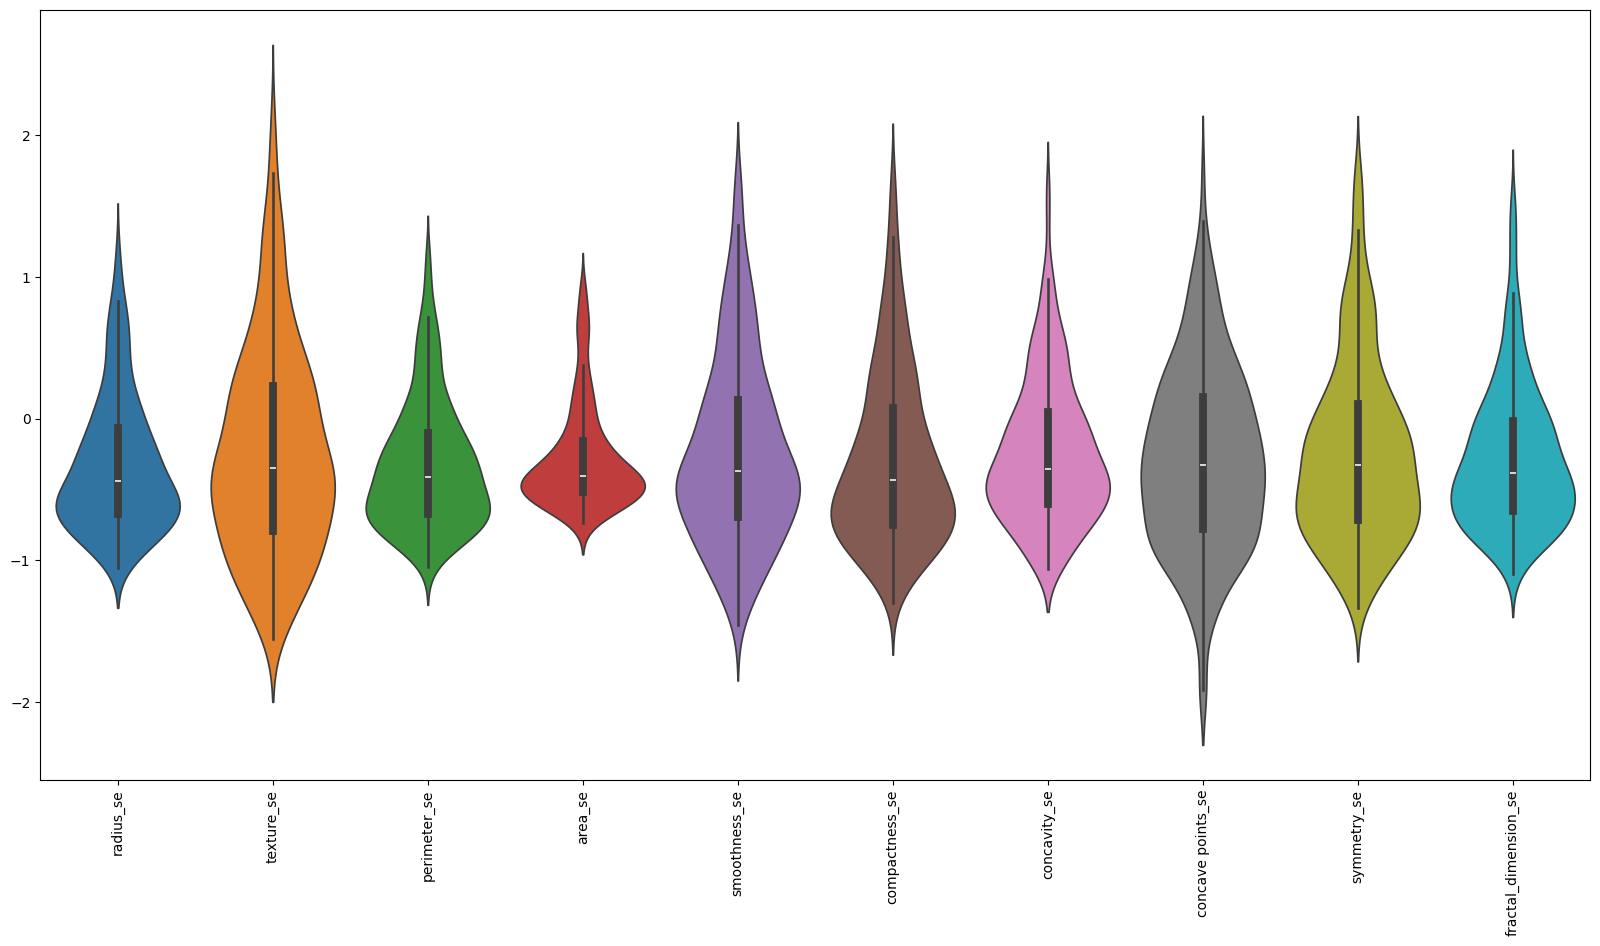

In [431]:
### violin plot and boxplot at cleaned df
plt.figure(figsize=(20,10))
sns.violinplot(data=cleaned_df)
plt.xticks(rotation=90)
plt.show()

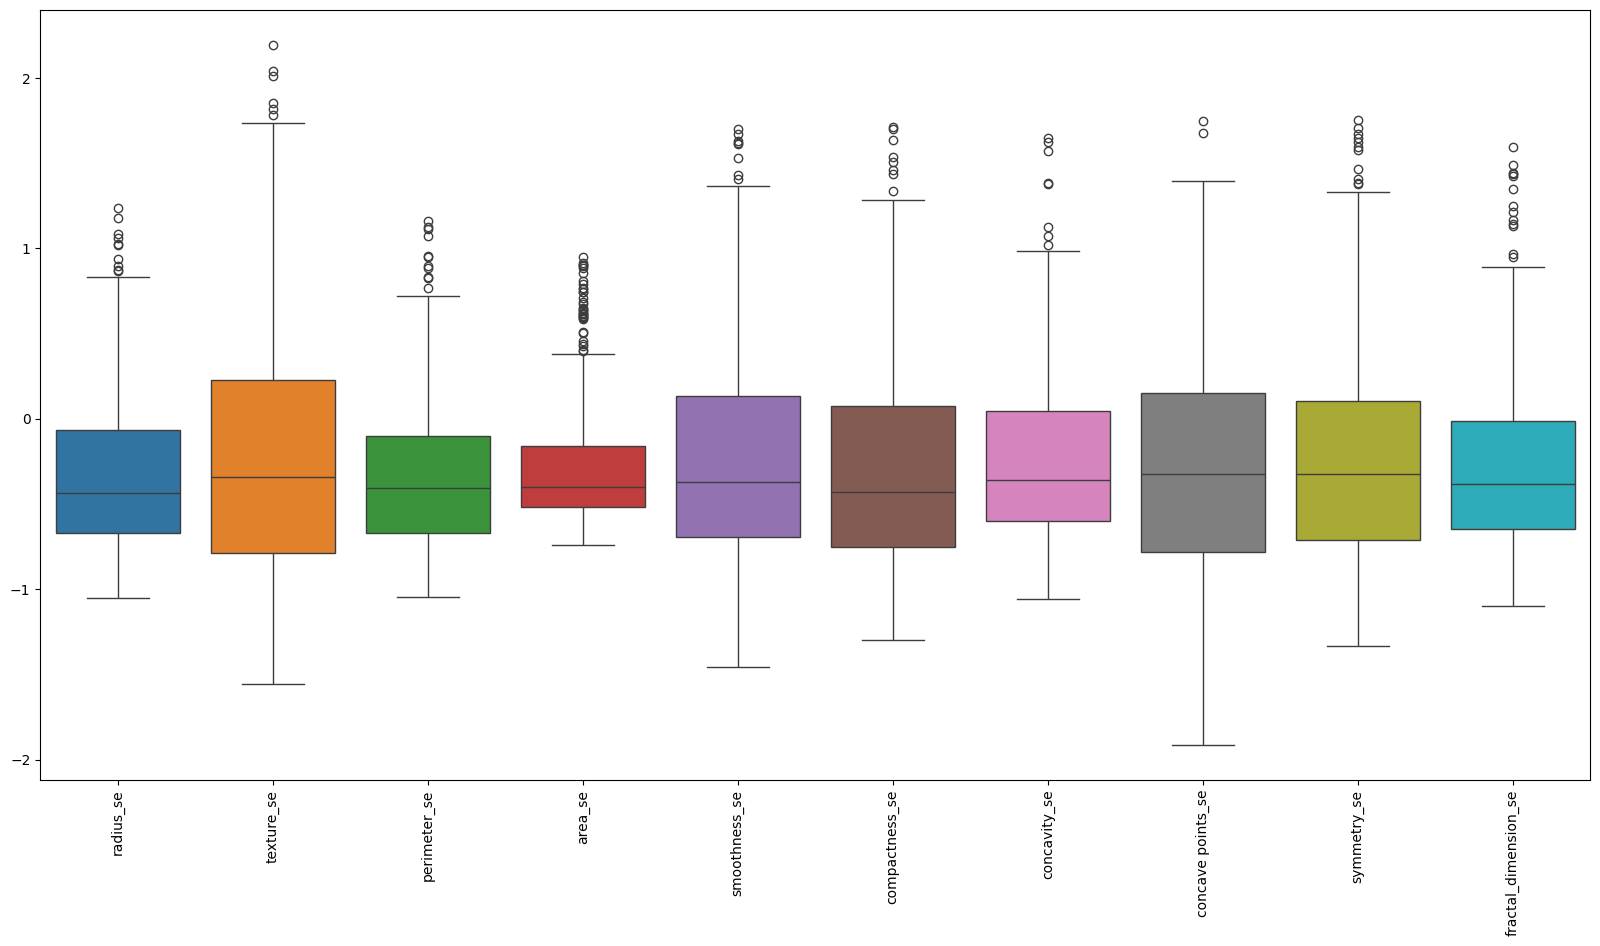

In [432]:
### violin plot and boxplot at cleaned df
plt.figure(figsize=(20,10))
sns.boxplot(data=cleaned_df)
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x1000 with 0 Axes>

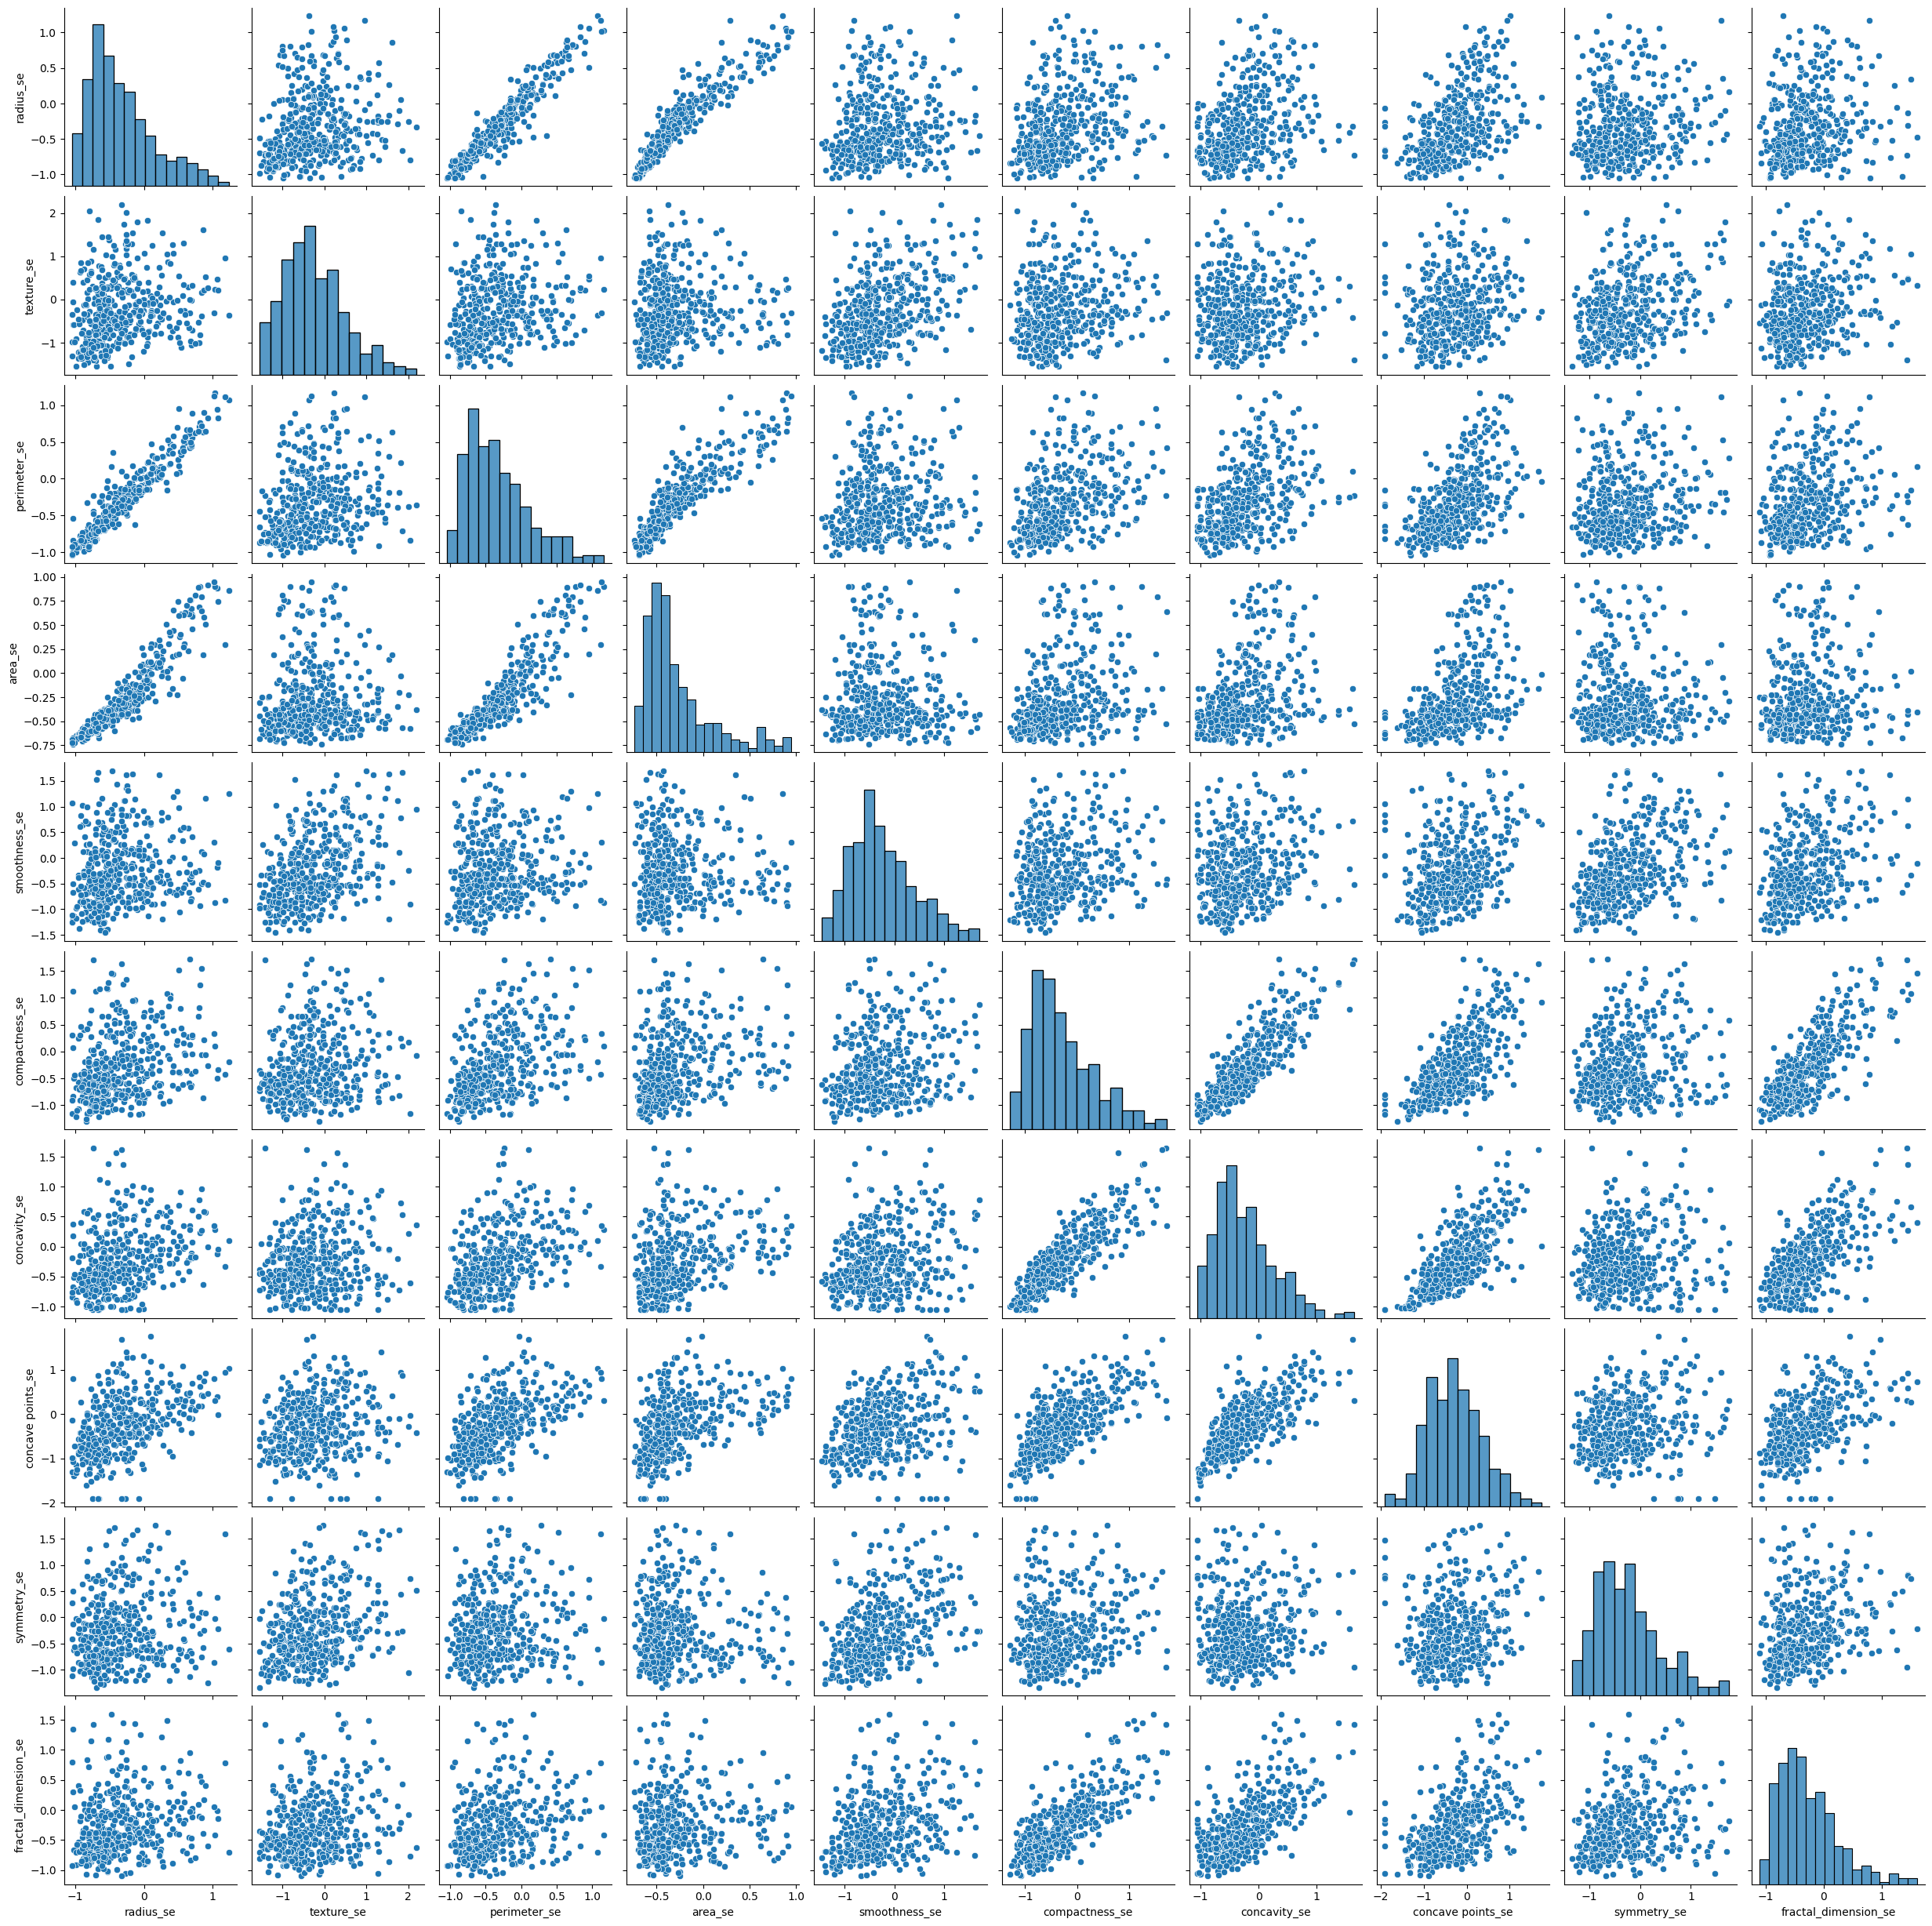

In [433]:
### violin plot and boxplot at cleaned df
plt.figure(figsize=(20,10))
sns.pairplot(data=cleaned_df)
plt.xticks(rotation=90)
plt.show()

In [434]:
# checking the correlation between the columns 
cleaned_df.corr(numeric_only=True)

radius_se  texture_se  perimeter_se   area_se  \
radius_se              1.000000    0.209172      0.953846  0.938162   
texture_se             0.209172    1.000000      0.209312  0.082007   
perimeter_se           0.953846    0.209312      1.000000  0.899489   
area_se                0.938162    0.082007      0.899489  1.000000   
smoothness_se          0.143285    0.410083      0.142233  0.002126   
compactness_se         0.311676    0.157790      0.440199  0.299872   
concavity_se           0.337312    0.143533      0.444690  0.350701   
concave points_se      0.497340    0.192552      0.575512  0.474841   
symmetry_se            0.130541    0.340456      0.157478 -0.037657   
fractal_dimension_se   0.209757    0.204147      0.289048  0.134129   

                      smoothness_se  compactness_se  concavity_se  \
radius_se                  0.143285        0.311676      0.337312   
texture_se                 0.410083        0.157790      0.143533   
perimeter_se               0.142233        0.440199      0.444690   
area_se                    0.002126        0.299872      0.350701   
smoothness_se              1.000000        0.217225      0.214317   
compactness_se             0.217225        1.000000      0.858720   
concavity_se               0.214317        0.858720      1.000000   
concave points_se          0.305766        0.695367      0.741676   
symmetry_se                0.426218        0.171068      0.117753   
fractal_dimension_se       0.346573        0.777298      0.657764   

                      concave points_se  symmetry_se  fractal_dimension_se  
radius_se                      0.497340     0.130541              0.209757  
texture_se                     0.192552     0.340456              0.204147  
perimeter_se                   0.575512     0.157478              0.289048  
area_se                        0.474841    -0.037657              0.134129  
smoothness_se                  0.305766     0.426218              0.346573  
compactness_se                 0.695367     0.171068              0.777298  
concavity_se                   0.741676     0.117753              0.657764  
concave points_se              1.000000     0.166231              0.528792  
symmetry_se                    0.166231     1.000000              0.251989  
fractal_dimension_se           0.528792     0.251989              1.000000

<p>Using selectKBest for feature selection ~ </p>

In [438]:
selector = SelectKBest(score_func=mutual_info_classif, k=5)
x_new_second = selector.fit_transform(x, y)

In [439]:
selector.get_feature_names_out()

array(['radius_se', 'perimeter_se', 'area_se', 'concavity_se',
       'concave points_se'], dtype=object)

In [441]:
selected_features = x.columns[selector.get_support()]

In [442]:
selected_features

Index(['radius_se', 'perimeter_se', 'area_se', 'concavity_se',
       'concave points_se'],
      dtype='object')

In [443]:
x

radius_se  texture_se  perimeter_se   area_se  smoothness_se  \
0     2.489734   -0.565265      2.833031  2.487578      -0.214002   
1     0.499255   -0.876244      0.263327  0.742402      -0.605351   
2     1.228676   -0.780083      0.850928  1.181336      -0.297005   
3     0.326373   -0.110409      0.286593 -0.288378       0.689702   
4     1.270543   -0.790244      1.273189  1.190357       1.483067   
..         ...         ...           ...       ...            ...   
564   2.782080    0.071025      2.379583  2.604187       1.086384   
565   1.300499    2.260938      1.156857  1.291565      -0.424010   
566   0.184892   -0.257371      0.276693  0.180698      -0.379342   
567   1.157935    0.686088      1.438530  1.009503      -0.173000   
568  -0.070279    0.383092     -0.157449 -0.466152       0.049342   

     compactness_se  concavity_se  concave points_se  symmetry_se  \
0          1.316862      0.724026           0.660820     1.148757   
1         -0.692926     -0.440780           0.260162    -0.805450   
2          0.814974      0.213076           1.424827     0.237036   
3          2.744280      0.819518           1.115007     4.732680   
4         -0.048520      0.828471           1.144205    -0.361092   
..              ...           ...                ...          ...   
564        0.191805      0.666001           2.067178    -1.138416   
565       -0.069758      0.252202           0.808431    -0.189161   
566        0.661277      0.510827           0.612157    -0.891416   
567        2.017716      1.302285           0.785721     0.326634   
568       -1.163516     -1.057501          -1.913447     0.752830   

     fractal_dimension_se  
0                0.907083  
1               -0.099444  
2                0.293559  
3                2.047511  
4                0.499328  
..                    ...  
564              0.167980  
565             -0.490556  
566              0.036727  
567              0.904057  
568             -0.382754  

[569 rows x 10 columns]

In [444]:
new_selected_x_features = x[selected_features]

In [445]:
new_selected_x_features

radius_se  perimeter_se   area_se  concavity_se  concave points_se
0     2.489734      2.833031  2.487578      0.724026           0.660820
1     0.499255      0.263327  0.742402     -0.440780           0.260162
2     1.228676      0.850928  1.181336      0.213076           1.424827
3     0.326373      0.286593 -0.288378      0.819518           1.115007
4     1.270543      1.273189  1.190357      0.828471           1.144205
..         ...           ...       ...           ...                ...
564   2.782080      2.379583  2.604187      0.666001           2.067178
565   1.300499      1.156857  1.291565      0.252202           0.808431
566   0.184892      0.276693  0.180698      0.510827           0.612157
567   1.157935      1.438530  1.009503      1.302285           0.785721
568  -0.070279     -0.157449 -0.466152     -1.057501          -1.913447

[569 rows x 5 columns]

In [448]:
### correlation of newly selected x features 
new_selected_x_features.corr(numeric_only=True)

radius_se  perimeter_se   area_se  concavity_se  \
radius_se           1.000000      0.972794  0.951830      0.332358   
perimeter_se        0.972794      1.000000  0.937655      0.362482   
area_se             0.951830      0.937655  1.000000      0.270895   
concavity_se        0.332358      0.362482  0.270895      1.000000   
concave points_se   0.513346      0.556264  0.415730      0.771804   

                   concave points_se  
radius_se                   0.513346  
perimeter_se                0.556264  
area_se                     0.415730  
concavity_se                0.771804  
concave points_se           1.000000

<Figure size 2000x1000 with 0 Axes>

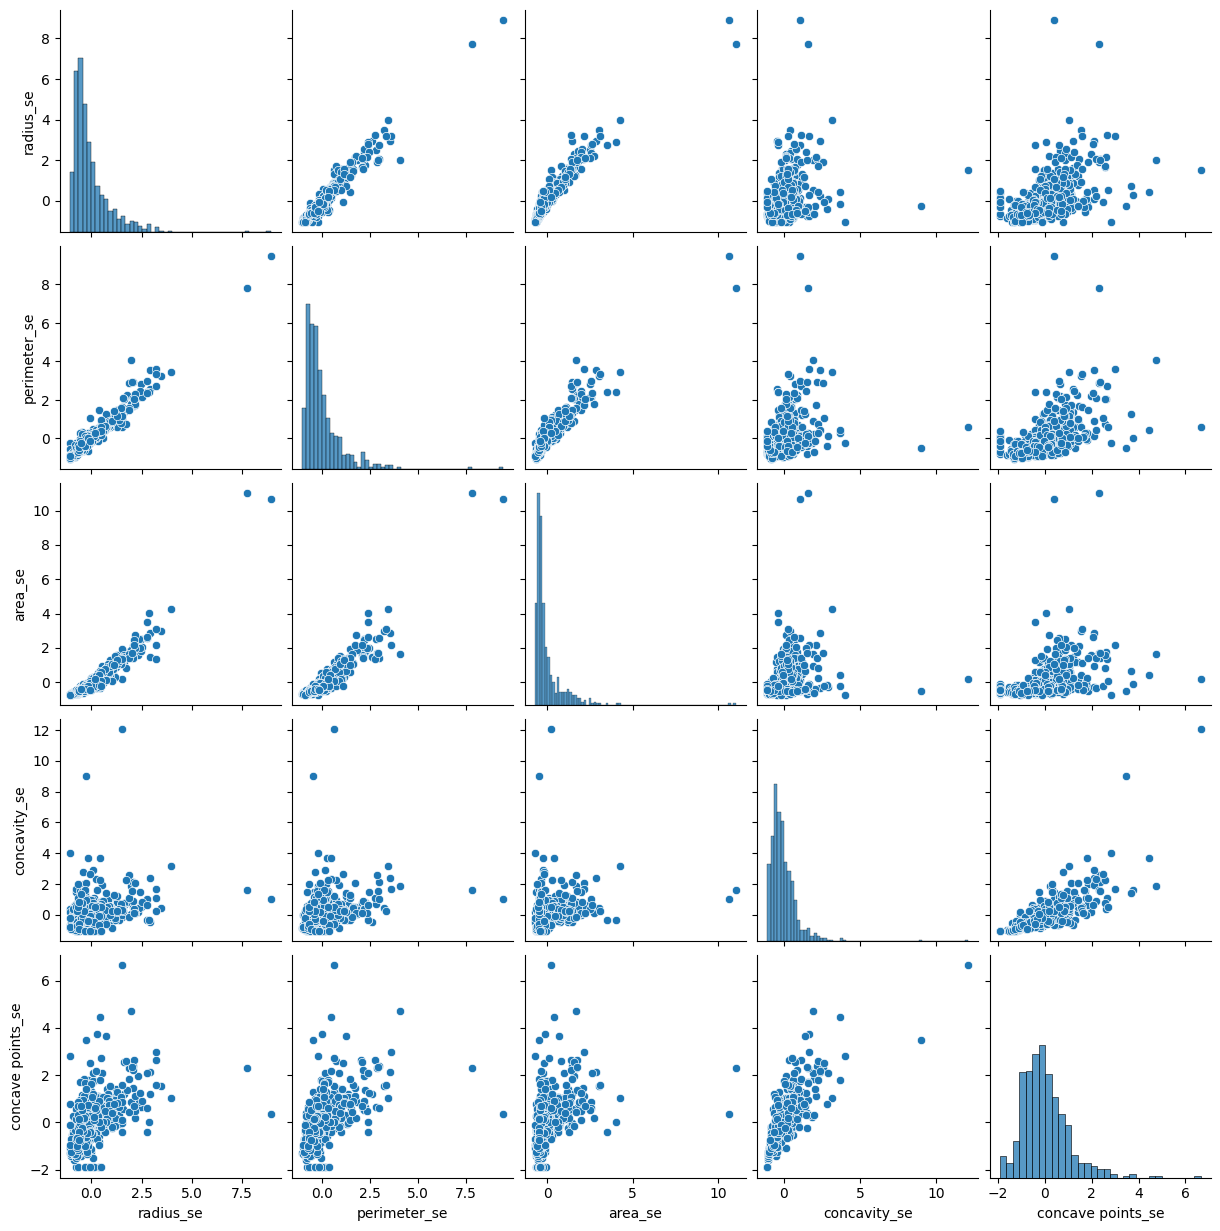

In [449]:
#pairplotting to see the relation between newly selected features

plt.figure(figsize=(20,10))
sns.pairplot(data=new_selected_x_features)
plt.show()

### handling imbalanced dataset ! 

In [450]:
from imblearn.under_sampling import RandomUnderSampler


In [451]:
under_sampler_1 = RandomUnderSampler()

In [452]:
ru_x,ru_y = under_sampler_1.fit_resample(new_selected_x_features,y)

In [454]:
ru_y.value_counts()

diagnosis
B    212
M    212
Name: count, dtype: int64

#### splitting the dataset into training and testing 

In [456]:
x_train,x_test,y_train,y_test = train_test_split(ru_x,ru_y,random_state=42,test_size=0.2)